In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
!pip install theano
!pip install tensorflow
!pip install keras

In [4]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [22]:
#As we know that the data is already clean we are going to start the machine laerning work
X=dataset.iloc[:,3:13].values
y=dataset.iloc[:,13].values

array(['Female', 'Female', 'Female', ..., 'Female', 'Male', 'Female'],
      dtype=object)

In [24]:
# Encoding the categorical data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer

# Geography column
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

# Male/Female
labelencoder_X = LabelEncoder()
X[:, 4] = labelencoder_X.fit_transform(X[:, 4])
X=X[:, 1:]

In [25]:
print(X,y)

[[0.0 0.0 619 ... 1 1 101348.88]
 [1.0 0.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [0.0 1.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]] [1 0 1 ... 1 1 0]


In [26]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
#scaling the Dataset so the Machine learning will learn efficiently
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [28]:
#importing the keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense
#Using the Dropout to prevent Overfitting
from keras.layers import Dropout

In [32]:
#Initializing the ANN
classifier=Sequential()
#Adding the layers[input the layers and first hidden layer]
classifier.add(Dense(units=6,kernel_initializer = 'uniform',activation="relu",input_dim=11))
classifier.add(Dropout(p=0.1))

#Note::we chose input_dim=11 because we have 11 independant variables and output_dim=(11+1)/2=6

#Adding The Second Hidden Layer
classifier.add(Dense(units=6,kernel_initializer ="uniform",activation="relu"))
classifier.add(Dropout(p=0.1))
#Adding the output layer
classifier.add(Dense(units=1,kernel_initializer ="uniform",activation="sigmoid"))

#Note::Use "softmax" instead of "sigmoid" if you have more than two categories

#compiling the ANN
classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [34]:
#fitting the model ANN
classifier.fit(X_train,y_train,batch_size=10,epochs=100)

Epoch 1/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4819 - accuracy: 0.7951
Epoch 2/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4290 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4242 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4196 - accuracy: 0.8201
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4171 - accuracy: 0.8249
Epoch 6/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4144 - accuracy: 0.8296
Epoch 7/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4127 - accuracy: 0.8325
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4109 - accuracy: 0.8325
Epoch 9/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4101 - accuracy: 0.8334
Epoch 10/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4093 - accura

Epoch 81/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4012 - accuracy: 0.8350
Epoch 82/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4010 - accuracy: 0.8351
Epoch 83/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4006 - accuracy: 0.8340
Epoch 84/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4011 - accuracy: 0.8346
Epoch 85/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4009 - accuracy: 0.8351
Epoch 86/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4003 - accuracy: 0.8359
Epoch 87/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4012 - accuracy: 0.8347
Epoch 88/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4012 - accuracy: 0.8349
Epoch 89/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4009 - accuracy: 0.8344
Epoch 90/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4007

In [35]:
#Making The Prediction 
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1553,   42],
       [ 279,  126]], dtype=int64)

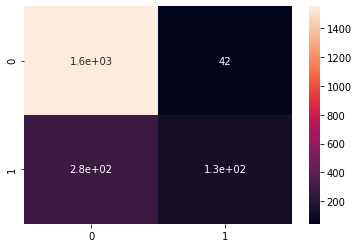

In [40]:
#make a pretty looking good confusion matrix
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.show()

In [43]:
#predicting a new single observation
"""
predict if this person will leave the bank or not::
geography:france
credit_score:600
gender:Male
age:40
tenure:3
balance:60000
number_of_product:2
As credit card:yes
Is active:yes
estimated salary:50000
"""
import numpy as np
new_prediction=classifier.predict(sc_X.transform(np.array([[0.0,0,600,1,40,3,60000,2,1,1,50000]])))
new_prediction=(new_prediction>0.5)
new_prediction #the result is showing::not going to leave the bank

array([[False]])

# Evaluating ,improving and tuning the model

In [47]:
#The need of Evaluating the Performance Using "k_fold validation" is important for the choice of the accuracies 

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def build_classifier():
    classifier=Sequential()
    classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_dim=11))
    classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
    classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    classifier.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
    return classifier
classifier=KerasClassifier(build_fn=build_classifier,batch_size=10,epochs=100)
accuracies=cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10,n_jobs=-1)
mean=accuracies.mean()
variance=accuracies.std()

In [50]:
variance  #low_Bias Variance because the result<0.1

0.012337061351880799

In [54]:
#Improving the model
#tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier=Sequential()
    classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu",input_dim=11))
    classifier.add(Dense(units=6,kernel_initializer="uniform",activation="relu"))
    classifier.add(Dense(units=1,kernel_initializer="uniform",activation="sigmoid"))
    classifier.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=['accuracy'])
    return classifier
classifier=KerasClassifier(build_fn=build_classifier)
parameters={"batch_size":[25,32],
           "epochs":[100,500],
           "optimizer":['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10)
grid_search=grid_search.fit(X_train,y_train)
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_

Epoch 1/100
288/288 [==============================] - 1s 4ms/step - loss: 0.6041 - accuracy: 0.7958
Epoch 2/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4440 - accuracy: 0.7971
Epoch 3/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4324 - accuracy: 0.7971
Epoch 4/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4294 - accuracy: 0.7971
Epoch 5/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4271 - accuracy: 0.7971
Epoch 6/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.7971
Epoch 7/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4233 - accuracy: 0.7971
Epoch 8/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.7971
Epoch 9/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.7971
Epoch 10/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4183 - accura

288/288 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8347
Epoch 82/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8354
Epoch 83/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3975 - accuracy: 0.8354
Epoch 84/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8357
Epoch 85/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8350
Epoch 86/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8360
Epoch 87/100
288/288 [==============================] - 2s 6ms/step - loss: 0.3969 - accuracy: 0.8354
Epoch 88/100
288/288 [==============================] - 2s 6ms/step - loss: 0.3970 - accuracy: 0.8361
Epoch 89/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3965 - accuracy: 0.8357
Epoch 90/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8349
Epoch 56/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8358
Epoch 57/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8354
Epoch 58/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8361
Epoch 59/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8347
Epoch 60/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8364
Epoch 61/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8353
Epoch 62/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4010 - accuracy: 0.8351
Epoch 63/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8350
Epoch 64/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4007 - accuracy: 

288/288 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8349
Epoch 36/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4049 - accuracy: 0.8353
Epoch 37/100
288/288 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8349
Epoch 38/100
288/288 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8351
Epoch 39/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8333
Epoch 40/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4038 - accuracy: 0.8349
Epoch 41/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4038 - accuracy: 0.8358
Epoch 42/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4035 - accuracy: 0.8356
Epoch 43/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 0.8369
Epoch 44/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4085 - accuracy: 0.8329
Epoch 16/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8344
Epoch 17/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8342
Epoch 18/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4071 - accuracy: 0.8357
Epoch 19/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4066 - accuracy: 0.8350
Epoch 20/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8353
Epoch 21/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4059 - accuracy: 0.8354
Epoch 22/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8347
Epoch 23/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8347
Epoch 24/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3966 - accuracy: 0.8374
Epoch 96/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8381
Epoch 97/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8369
Epoch 98/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8382
Epoch 99/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8371
Epoch 100/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8376
Epoch 1/100
288/288 [==============================] - 1s 3ms/step - loss: 0.5547 - accuracy: 0.7918
Epoch 2/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.7937
Epoch 3/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4319 - accuracy: 0.7937
Epoch 4/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.7

288/288 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8379
Epoch 76/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8379
Epoch 77/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 0.8361
Epoch 78/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3947 - accuracy: 0.8379
Epoch 79/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3951 - accuracy: 0.8367
Epoch 80/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8388
Epoch 81/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3949 - accuracy: 0.8368
Epoch 82/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8365
Epoch 83/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8371
Epoch 84/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 

288/288 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8346
Epoch 56/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8342
Epoch 57/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8346
Epoch 58/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8335
Epoch 59/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8342
Epoch 60/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8347
Epoch 61/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8342
Epoch 62/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4012 - accuracy: 0.8344
Epoch 63/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8326
Epoch 64/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8346
Epoch 36/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8350
Epoch 37/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 0.8350
Epoch 38/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8350
Epoch 39/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4039 - accuracy: 0.8358
Epoch 40/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8350
Epoch 41/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4037 - accuracy: 0.8358
Epoch 42/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8351
Epoch 43/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4036 - accuracy: 0.8353
Epoch 44/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4031 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3672 - accuracy: 0.8478
Epoch 15/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8500
Epoch 16/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3639 - accuracy: 0.8510
Epoch 17/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3625 - accuracy: 0.8512
Epoch 18/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8517
Epoch 19/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8524
Epoch 20/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3576 - accuracy: 0.8544
Epoch 21/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3567 - accuracy: 0.8533
Epoch 22/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3546 - accuracy: 0.8564
Epoch 23/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3542 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8619
Epoch 95/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8624
Epoch 96/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8599
Epoch 97/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8612
Epoch 98/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8606
Epoch 99/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3361 - accuracy: 0.8622
Epoch 100/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8604
Epoch 1/100
288/288 [==============================] - 1s 3ms/step - loss: 0.5488 - accuracy: 0.7950
Epoch 2/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4350 - accuracy: 0.7957
Epoch 3/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.

288/288 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8361
Epoch 75/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8368
Epoch 76/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8374
Epoch 77/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8374
Epoch 78/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8364
Epoch 79/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8371
Epoch 80/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8375
Epoch 81/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8361
Epoch 82/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8368
Epoch 83/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8336
Epoch 55/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8331
Epoch 56/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8324
Epoch 57/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8326
Epoch 58/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8329
Epoch 59/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8331
Epoch 60/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4036 - accuracy: 0.8351
Epoch 61/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8321
Epoch 62/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4036 - accuracy: 0.8332
Epoch 63/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4041 - accuracy: 

288/288 [==============================] - 1s 4ms/step - loss: 0.3956 - accuracy: 0.8347
Epoch 35/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8357
Epoch 36/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3952 - accuracy: 0.8360
Epoch 37/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3952 - accuracy: 0.8338
Epoch 38/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3950 - accuracy: 0.8351
Epoch 39/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8350
Epoch 40/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3945 - accuracy: 0.8347
Epoch 41/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8354
Epoch 42/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8351
Epoch 43/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8326
Epoch 15/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8313
Epoch 16/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4110 - accuracy: 0.8308
Epoch 17/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4102 - accuracy: 0.8325
Epoch 18/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4096 - accuracy: 0.8317
Epoch 19/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8332
Epoch 20/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8338
Epoch 21/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8333
Epoch 22/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8342
Epoch 23/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8363
Epoch 95/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8374
Epoch 96/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8369
Epoch 97/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8357
Epoch 98/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 0.8363
Epoch 99/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3947 - accuracy: 0.8372
Epoch 100/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8363
Epoch 1/100
288/288 [==============================] - 1s 3ms/step - loss: 0.5634 - accuracy: 0.7956
Epoch 2/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.7956
Epoch 3/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4326 - accuracy: 0.

288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8360
Epoch 75/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8342
Epoch 76/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8336
Epoch 77/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8357
Epoch 78/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8344
Epoch 79/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4015 - accuracy: 0.8350
Epoch 80/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8339
Epoch 81/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8339
Epoch 82/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8331
Epoch 83/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4016 - accuracy: 

288/288 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8354
Epoch 55/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3995 - accuracy: 0.8357
Epoch 56/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8344
Epoch 57/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8354
Epoch 58/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8349
Epoch 59/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8347
Epoch 60/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8356
Epoch 61/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8343
Epoch 62/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8353
Epoch 63/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3991 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4086 - accuracy: 0.8331
Epoch 35/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4083 - accuracy: 0.8332
Epoch 36/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4081 - accuracy: 0.8331
Epoch 37/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8326
Epoch 38/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4079 - accuracy: 0.8326
Epoch 39/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8326
Epoch 40/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4076 - accuracy: 0.8336
Epoch 41/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4073 - accuracy: 0.8311
Epoch 42/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8332: 0s - loss: 0.4066 - accuracy: 
Epoch 43/100
288/288 [==============================] - 1s 3ms/

288/288 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8314
Epoch 14/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8317
Epoch 15/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4115 - accuracy: 0.8332
Epoch 16/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8331
Epoch 17/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8338
Epoch 18/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4095 - accuracy: 0.8335
Epoch 19/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4091 - accuracy: 0.8344
Epoch 20/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4084 - accuracy: 0.8331
Epoch 21/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4082 - accuracy: 0.8336
Epoch 22/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8344
Epoch 94/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8342
Epoch 95/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8346
Epoch 96/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8343
Epoch 97/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8335
Epoch 98/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8365
Epoch 99/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8353
Epoch 100/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8346
Epoch 1/100
288/288 [==============================] - 1s 3ms/step - loss: 0.5795 - accuracy: 0.7962
Epoch 2/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4417 - accuracy: 0

288/288 [==============================] - 1s 3ms/step - loss: 0.4016 - accuracy: 0.8357
Epoch 74/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8356
Epoch 75/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4018 - accuracy: 0.8354
Epoch 76/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.8346
Epoch 77/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4013 - accuracy: 0.8351
Epoch 78/100
288/288 [==============================] - ETA: 0s - loss: 0.4017 - accuracy: 0.83 - 1s 4ms/step - loss: 0.4018 - accuracy: 0.8344
Epoch 79/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4016 - accuracy: 0.8349
Epoch 80/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8358
Epoch 81/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8349
Epoch 82/100
288/288 [==============================]

288/288 [==============================] - 1s 3ms/step - loss: 0.3998 - accuracy: 0.8360
Epoch 53/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8357
Epoch 54/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3999 - accuracy: 0.8343
Epoch 55/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8351
Epoch 56/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4000 - accuracy: 0.8343
Epoch 57/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8349
Epoch 58/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3998 - accuracy: 0.8342
Epoch 59/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8354
Epoch 60/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 0.8342
Epoch 61/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3997 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8375
Epoch 33/100
288/288 [==============================] - 1s 4ms/step - loss: 0.3948 - accuracy: 0.8392
Epoch 34/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8386
Epoch 35/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3946 - accuracy: 0.8374
Epoch 36/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3944 - accuracy: 0.8383
Epoch 37/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8382
Epoch 38/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8368
Epoch 39/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8382
Epoch 40/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8376
Epoch 41/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4162 - accuracy: 0.8281
Epoch 13/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4154 - accuracy: 0.8303
Epoch 14/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4146 - accuracy: 0.8300
Epoch 15/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4140 - accuracy: 0.8314
Epoch 16/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4136 - accuracy: 0.8306
Epoch 17/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4129 - accuracy: 0.8321
Epoch 18/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4126 - accuracy: 0.8308
Epoch 19/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4122 - accuracy: 0.8335
Epoch 20/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4113 - accuracy: 0.8338
Epoch 21/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4111 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8324
Epoch 93/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4036 - accuracy: 0.8329
Epoch 94/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4036 - accuracy: 0.8336
Epoch 95/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4035 - accuracy: 0.8318
Epoch 96/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4035 - accuracy: 0.8335
Epoch 97/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4033 - accuracy: 0.8326
Epoch 98/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4030 - accuracy: 0.8335
Epoch 99/100
288/288 [==============================] - 1s 4ms/step - loss: 0.4027 - accuracy: 0.8339
Epoch 100/100
288/288 [==============================] - 1s 3ms/step - loss: 0.4027 - accuracy: 0.8331
Epoch 1/500
288/288 [==============================] - 1s 3ms/step - loss: 0.5490 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8322
Epoch 72/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8328
Epoch 73/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3978 - accuracy: 0.8346
Epoch 74/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8342
Epoch 75/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8350
Epoch 76/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3977 - accuracy: 0.8346
Epoch 77/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8357
Epoch 78/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3978 - accuracy: 0.8343
Epoch 79/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8335
Epoch 80/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 

288/288 [==============================] - 1s 5ms/step - loss: 0.3955 - accuracy: 0.8356
Epoch 151/500
288/288 [==============================] - 1s 5ms/step - loss: 0.3955 - accuracy: 0.8342
Epoch 152/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3956 - accuracy: 0.8358
Epoch 153/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8349
Epoch 154/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8336
Epoch 155/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3955 - accuracy: 0.8349
Epoch 156/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3954 - accuracy: 0.8338
Epoch 157/500
288/288 [==============================] - 2s 5ms/step - loss: 0.3962 - accuracy: 0.8357
Epoch 158/500
288/288 [==============================] - 1s 5ms/step - loss: 0.3956 - accuracy: 0.8347
Epoch 159/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3954 - a

288/288 [==============================] - 1s 4ms/step - loss: 0.3936 - accuracy: 0.8361
Epoch 230/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3939 - accuracy: 0.8368
Epoch 231/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3937 - accuracy: 0.8353
Epoch 232/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3936 - accuracy: 0.8361
Epoch 233/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3933 - accuracy: 0.8357
Epoch 234/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.8376
Epoch 235/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3937 - accuracy: 0.8358
Epoch 236/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3932 - accuracy: 0.8363
Epoch 237/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3934 - accuracy: 0.8363
Epoch 238/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3930 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3909 - accuracy: 0.8363
Epoch 309/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8371
Epoch 310/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8357
Epoch 311/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8371
Epoch 312/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3910 - accuracy: 0.8367
Epoch 313/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8364
Epoch 314/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3903 - accuracy: 0.8368
Epoch 315/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3909 - accuracy: 0.8363
Epoch 316/500
288/288 [==============================] - 1s 5ms/step - loss: 0.3908 - accuracy: 0.8372
Epoch 317/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3905 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3897 - accuracy: 0.8369
Epoch 388/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8371
Epoch 389/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3893 - accuracy: 0.8375
Epoch 390/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8369
Epoch 391/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3902 - accuracy: 0.8371
Epoch 392/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8371
Epoch 393/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8372
Epoch 394/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3901 - accuracy: 0.8368
Epoch 395/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8376
Epoch 396/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3896 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8363
Epoch 467/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8361
Epoch 468/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8382
Epoch 469/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.8369
Epoch 470/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8363
Epoch 471/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8365
Epoch 472/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8364
Epoch 473/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.8379
Epoch 474/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8383
Epoch 475/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3894 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.4016 - accuracy: 0.8344
Epoch 47/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8346
Epoch 48/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4018 - accuracy: 0.8347
Epoch 49/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8358
Epoch 50/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4014 - accuracy: 0.8358
Epoch 51/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4013 - accuracy: 0.8354
Epoch 52/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8344
Epoch 53/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8365
Epoch 54/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8354
Epoch 55/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8342
Epoch 127/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8351
Epoch 128/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8349
Epoch 129/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8374
Epoch 130/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8357
Epoch 131/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8371
Epoch 132/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8354
Epoch 133/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8353
Epoch 134/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8365
Epoch 135/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8358
Epoch 206/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8367
Epoch 207/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8361
Epoch 208/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8363
Epoch 209/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8383
Epoch 210/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8379
Epoch 211/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8367
Epoch 212/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8360
Epoch 213/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8379
Epoch 214/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8369
Epoch 285/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8368
Epoch 286/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8356
Epoch 287/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8383
Epoch 288/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8367
Epoch 289/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8358
Epoch 290/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8376
Epoch 291/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8367
Epoch 292/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8365
Epoch 293/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3986 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8379
Epoch 364/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8374
Epoch 365/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8374
Epoch 366/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8383
Epoch 367/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8371
Epoch 368/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8367
Epoch 369/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8381
Epoch 370/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8379
Epoch 371/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8378
Epoch 372/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8364
Epoch 443/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8382
Epoch 444/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8365
Epoch 445/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3986 - accuracy: 0.8364
Epoch 446/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8368
Epoch 447/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8371
Epoch 448/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3988 - accuracy: 0.8364
Epoch 449/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3984 - accuracy: 0.8361
Epoch 450/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8374: 0s - l
Epoch 451/500
288/288 [==============================] - 1s 3ms/step - loss: 0.

288/288 [==============================] - 1s 3ms/step - loss: 0.4030 - accuracy: 0.8358
Epoch 22/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4022 - accuracy: 0.8340
Epoch 23/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4011 - accuracy: 0.8358
Epoch 24/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4006 - accuracy: 0.8347
Epoch 25/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3999 - accuracy: 0.8357
Epoch 26/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8354
Epoch 27/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8353
Epoch 28/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8378
Epoch 29/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3978 - accuracy: 0.8375
Epoch 30/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8389
Epoch 102/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8389
Epoch 103/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3920 - accuracy: 0.8383
Epoch 104/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8393
Epoch 105/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3919 - accuracy: 0.8379
Epoch 106/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8386
Epoch 107/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8410
Epoch 108/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3916 - accuracy: 0.8386
Epoch 109/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3912 - accuracy: 0.8386
Epoch 110/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3916 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3415 - accuracy: 0.8578
Epoch 181/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3418 - accuracy: 0.8582
Epoch 182/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8576
Epoch 183/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8587
Epoch 184/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8576
Epoch 185/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3411 - accuracy: 0.8579
Epoch 186/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3400 - accuracy: 0.8585
Epoch 187/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8589
Epoch 188/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3396 - accuracy: 0.8596
Epoch 189/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3399 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8601
Epoch 260/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8621
Epoch 261/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8614
Epoch 262/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8608
Epoch 263/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8632
Epoch 264/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3363 - accuracy: 0.8619
Epoch 265/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3372 - accuracy: 0.8624
Epoch 266/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3367 - accuracy: 0.8635
Epoch 267/500
288/288 [==============================] - 2s 6ms/step - loss: 0.3369 - accuracy: 0.8619
Epoch 268/500
288/288 [==============================] - 2s 6ms/step - loss: 0.3363 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8600: 0s - los
Epoch 339/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8618: 0s - l
Epoch 340/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8631
Epoch 341/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8625
Epoch 342/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8599
Epoch 343/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8614
Epoch 344/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8603
Epoch 345/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8632
Epoch 346/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8626
Epoch 347/500
288/288 [==============================] - 1s 2ms/step 

288/288 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8624
Epoch 417/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8607
Epoch 418/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3336 - accuracy: 0.8599
Epoch 419/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3333 - accuracy: 0.8614
Epoch 420/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3341 - accuracy: 0.8615
Epoch 421/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8632
Epoch 422/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8622
Epoch 423/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3339 - accuracy: 0.8621
Epoch 424/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8581
Epoch 425/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3337 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8635
Epoch 496/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.8615
Epoch 497/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8626
Epoch 498/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8596
Epoch 499/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8635
Epoch 500/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3327 - accuracy: 0.8636
Epoch 1/500
288/288 [==============================] - 1s 4ms/step - loss: 0.5592 - accuracy: 0.7971
Epoch 2/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4296 - accuracy: 0.7975
Epoch 3/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4182 - accuracy: 0.7975
Epoch 4/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4088 - accuracy:

Epoch 75/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8636
Epoch 76/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3367 - accuracy: 0.8643
Epoch 77/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8621
Epoch 78/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3373 - accuracy: 0.8622
Epoch 79/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8611
Epoch 80/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8626
Epoch 81/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8617
Epoch 82/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8626
Epoch 83/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3364 - accuracy: 0.8635
Epoch 84/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3368

288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8628
Epoch 155/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8629
Epoch 156/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8643
Epoch 157/500
288/288 [==============================] - ETA: 0s - loss: 0.3357 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8636
Epoch 158/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8651
Epoch 159/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3354 - accuracy: 0.8633
Epoch 160/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8622
Epoch 161/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8644
Epoch 162/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3365 - accuracy: 0.8625
Epoch 163/500
288/288 [======================

288/288 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8636
Epoch 234/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8644
Epoch 235/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8647
Epoch 236/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8644
Epoch 237/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8635
Epoch 238/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8625
Epoch 239/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8642
Epoch 240/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8639
Epoch 241/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3347 - accuracy: 0.8642
Epoch 242/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8642
Epoch 313/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8635
Epoch 314/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8633
Epoch 315/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8629
Epoch 316/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3342 - accuracy: 0.8656
Epoch 317/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8621
Epoch 318/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8625
Epoch 319/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8647
Epoch 320/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8618
Epoch 321/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3341 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3339 - accuracy: 0.8667
Epoch 392/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8629
Epoch 393/500
288/288 [==============================] - 2s 7ms/step - loss: 0.3341 - accuracy: 0.8651
Epoch 394/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8646
Epoch 395/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3343 - accuracy: 0.8649
Epoch 396/500
288/288 [==============================] - 1s 5ms/step - loss: 0.3343 - accuracy: 0.8643
Epoch 397/500
288/288 [==============================] - 1s 5ms/step - loss: 0.3342 - accuracy: 0.8657
Epoch 398/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3344 - accuracy: 0.8642
Epoch 399/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8649
Epoch 400/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3342 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8639
Epoch 471/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8639
Epoch 472/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8635
Epoch 473/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8643
Epoch 474/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8639
Epoch 475/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3340 - accuracy: 0.8639
Epoch 476/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3341 - accuracy: 0.8637
Epoch 477/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8650
Epoch 478/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8642
Epoch 479/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3339 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8608
Epoch 50/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8628: 0s - l
Epoch 51/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3379 - accuracy: 0.8622
Epoch 52/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8619
Epoch 53/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8618
Epoch 54/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8621
Epoch 55/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3376 - accuracy: 0.8614
Epoch 56/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3374 - accuracy: 0.8615
Epoch 57/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 0.8617
Epoch 58/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3374 - ac

288/288 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8633
Epoch 129/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8624
Epoch 130/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3357 - accuracy: 0.8643
Epoch 131/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8644
Epoch 132/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8619
Epoch 133/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8624
Epoch 134/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8631
Epoch 135/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3359 - accuracy: 0.8629
Epoch 136/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8626: 0s - los
Epoch 137/500
288/288 [==============================] - 1s 3ms/step - loss: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8614
Epoch 208/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8629
Epoch 209/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8633
Epoch 210/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8636
Epoch 211/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8628
Epoch 212/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8631
Epoch 213/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8628
Epoch 214/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8643
Epoch 215/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3346 - accuracy: 0.8628
Epoch 216/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3349 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8644
Epoch 287/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8649
Epoch 288/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8628
Epoch 289/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8642
Epoch 290/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8631
Epoch 291/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8625
Epoch 292/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8636
Epoch 293/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8626
Epoch 294/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8621
Epoch 295/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - a

288/288 [==============================] - 2s 8ms/step - loss: 0.3349 - accuracy: 0.8633
Epoch 366/500
288/288 [==============================] - 2s 7ms/step - loss: 0.3350 - accuracy: 0.8629
Epoch 367/500
288/288 [==============================] - 2s 7ms/step - loss: 0.3352 - accuracy: 0.8615
Epoch 368/500
288/288 [==============================] - 2s 6ms/step - loss: 0.3346 - accuracy: 0.8626
Epoch 369/500
288/288 [==============================] - 2s 6ms/step - loss: 0.3347 - accuracy: 0.8633
Epoch 370/500
288/288 [==============================] - 2s 6ms/step - loss: 0.3349 - accuracy: 0.8628
Epoch 371/500
288/288 [==============================] - 2s 7ms/step - loss: 0.3344 - accuracy: 0.8624
Epoch 372/500
288/288 [==============================] - 1s 5ms/step - loss: 0.3350 - accuracy: 0.8618
Epoch 373/500
288/288 [==============================] - 2s 5ms/step - loss: 0.3346 - accuracy: 0.8632
Epoch 374/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8639
Epoch 444/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3348 - accuracy: 0.8633
Epoch 445/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3345 - accuracy: 0.8647
Epoch 446/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3345 - accuracy: 0.8639
Epoch 447/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8639
Epoch 448/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8628
Epoch 449/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3354 - accuracy: 0.8622
Epoch 450/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8624
Epoch 451/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3344 - accuracy: 0.8615
Epoch 452/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8343
Epoch 23/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4074 - accuracy: 0.8354
Epoch 24/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4070 - accuracy: 0.8349
Epoch 25/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4064 - accuracy: 0.8346
Epoch 26/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8353
Epoch 27/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4058 - accuracy: 0.8350
Epoch 28/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4057 - accuracy: 0.8350
Epoch 29/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4051 - accuracy: 0.8338: 0s -
Epoch 30/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4050 - accuracy: 0.8342
Epoch 31/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4045 - accu

288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8361
Epoch 103/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8353
Epoch 104/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8344
Epoch 105/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8354
Epoch 106/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3990 - accuracy: 0.8364
Epoch 107/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3993 - accuracy: 0.8354
Epoch 108/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8353
Epoch 109/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8349
Epoch 110/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3992 - accuracy: 0.8358
Epoch 111/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3988 - a

288/288 [==============================] - 2s 5ms/step - loss: 0.3986 - accuracy: 0.8356
Epoch 182/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3989 - accuracy: 0.8357
Epoch 183/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3990 - accuracy: 0.8361
Epoch 184/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3987 - accuracy: 0.8347
Epoch 185/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8363
Epoch 186/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3991 - accuracy: 0.8365
Epoch 187/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3986 - accuracy: 0.8340
Epoch 188/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8364
Epoch 189/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8368
Epoch 190/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3982 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.3983 - accuracy: 0.8358
Epoch 261/500
288/288 [==============================] - ETA: 0s - loss: 0.3974 - accuracy: 0.83 - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8367
Epoch 262/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8361
Epoch 263/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3982 - accuracy: 0.8367
Epoch 264/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8356
Epoch 265/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8358
Epoch 266/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3985 - accuracy: 0.8367
Epoch 267/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8356
Epoch 268/500
288/288 [==============================] - 2s 6ms/step - loss: 0.3980 - accuracy: 0.8357
Epoch 269/500
288/288 [======================

288/288 [==============================] - 1s 3ms/step - loss: 0.3983 - accuracy: 0.8356
Epoch 340/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8357
Epoch 341/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8374
Epoch 342/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8363
Epoch 343/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3982 - accuracy: 0.8367
Epoch 344/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3981 - accuracy: 0.8364
Epoch 345/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3985 - accuracy: 0.8356
Epoch 346/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8371
Epoch 347/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8349
Epoch 348/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3980 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8364
Epoch 418/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3977 - accuracy: 0.8356
Epoch 419/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8353
Epoch 420/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3976 - accuracy: 0.8354
Epoch 421/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3980 - accuracy: 0.8364
Epoch 422/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8365
Epoch 423/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8358
Epoch 424/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3979 - accuracy: 0.8346
Epoch 425/500
288/288 [==============================] - ETA: 0s - loss: 0.3975 - accuracy: 0.83 - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8356
Epoch 426/500
288/288 [======================

288/288 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8363
Epoch 497/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8375
Epoch 498/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8372
Epoch 499/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8371
Epoch 500/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8354
Epoch 1/500
288/288 [==============================] - 1s 3ms/step - loss: 0.5636 - accuracy: 0.7964
Epoch 2/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4362 - accuracy: 0.7969
Epoch 3/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4295 - accuracy: 0.7969
Epoch 4/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4247 - accuracy: 0.7969
Epoch 5/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4206 - accuracy: 0

288/288 [==============================] - 1s 3ms/step - loss: 0.3797 - accuracy: 0.8393
Epoch 77/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3786 - accuracy: 0.8392
Epoch 78/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3775 - accuracy: 0.8364
Epoch 79/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3764 - accuracy: 0.8396
Epoch 80/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3751 - accuracy: 0.8379
Epoch 81/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3747 - accuracy: 0.8383
Epoch 82/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3735 - accuracy: 0.8390
Epoch 83/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8372
Epoch 84/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3732 - accuracy: 0.8388: 0s - loss: 0.3724 - accuracy: 0.
Epoch 85/500
288/288 [==============================] - 1s 3m

288/288 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8614
Epoch 156/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8590
Epoch 157/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8600
Epoch 158/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8596: 0s - l
Epoch 159/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8587
Epoch 160/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8606
Epoch 161/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3428 - accuracy: 0.8603
Epoch 162/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8635
Epoch 163/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3423 - accuracy: 0.8624
Epoch 164/500
288/288 [==============================] - 1s 3ms/step - loss: 0.

288/288 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8612
Epoch 235/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3387 - accuracy: 0.8596
Epoch 236/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8600
Epoch 237/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3382 - accuracy: 0.8619
Epoch 238/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8612
Epoch 239/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3381 - accuracy: 0.8624
Epoch 240/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3383 - accuracy: 0.8621
Epoch 241/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.8606
Epoch 242/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3384 - accuracy: 0.8622
Epoch 243/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3379 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8615
Epoch 314/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3353 - accuracy: 0.8644
Epoch 315/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8621
Epoch 316/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8618
Epoch 317/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3349 - accuracy: 0.8628
Epoch 318/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8612
Epoch 319/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8640
Epoch 320/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3347 - accuracy: 0.8622
Epoch 321/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3351 - accuracy: 0.8617
Epoch 322/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3356 - a

288/288 [==============================] - 1s 4ms/step - loss: 0.3327 - accuracy: 0.8629
Epoch 393/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3322 - accuracy: 0.8639
Epoch 394/500
288/288 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8654
Epoch 395/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8635
Epoch 396/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8637
Epoch 397/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8651
Epoch 398/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8650
Epoch 399/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8635
Epoch 400/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8639
Epoch 401/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3327 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8644
Epoch 472/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8658
Epoch 473/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3310 - accuracy: 0.8647
Epoch 474/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8662
Epoch 475/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3308 - accuracy: 0.8650
Epoch 476/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8650
Epoch 477/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8644
Epoch 478/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8643
Epoch 479/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8654
Epoch 480/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3307 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3968 - accuracy: 0.8368
Epoch 51/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 0.8386
Epoch 52/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8350
Epoch 53/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8371
Epoch 54/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8381
Epoch 55/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3955 - accuracy: 0.8364
Epoch 56/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 0.8372
Epoch 57/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3953 - accuracy: 0.8360
Epoch 58/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8363
Epoch 59/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3951 - accuracy: 

288/288 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8365
Epoch 130/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8385
Epoch 131/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3901 - accuracy: 0.8392
Epoch 132/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8385
Epoch 133/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8388: 1s
Epoch 134/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3908 - accuracy: 0.8378
Epoch 135/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8385
Epoch 136/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3905 - accuracy: 0.8382
Epoch 137/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8383
Epoch 138/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3905

288/288 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8369
Epoch 209/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3894 - accuracy: 0.8400
Epoch 210/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8369
Epoch 211/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8390
Epoch 212/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8390
Epoch 213/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8378: 0s - loss:
Epoch 214/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3895 - accuracy: 0.8389
Epoch 215/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8378
Epoch 216/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8375
Epoch 217/500
288/288 [==============================] - 1s 3ms/step - loss

288/288 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8469
Epoch 287/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3644 - accuracy: 0.8476
Epoch 288/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3633 - accuracy: 0.8474
Epoch 289/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3634 - accuracy: 0.8483
Epoch 290/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3615 - accuracy: 0.8481
Epoch 291/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3623 - accuracy: 0.8479
Epoch 292/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8486
Epoch 293/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8501
Epoch 294/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3606 - accuracy: 0.8493
Epoch 295/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3601 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3321 - accuracy: 0.8642
Epoch 366/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3323 - accuracy: 0.8665
Epoch 367/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8674
Epoch 368/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8665
Epoch 369/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8653
Epoch 370/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8660
Epoch 371/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8675
Epoch 372/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3315 - accuracy: 0.8669
Epoch 373/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3319 - accuracy: 0.8658
Epoch 374/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3312 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8668
Epoch 445/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3293 - accuracy: 0.8642
Epoch 446/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8646
Epoch 447/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3291 - accuracy: 0.8650
Epoch 448/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3293 - accuracy: 0.8649
Epoch 449/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8658
Epoch 450/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3292 - accuracy: 0.8662
Epoch 451/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8665
Epoch 452/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3290 - accuracy: 0.8654
Epoch 453/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3289 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.4038 - accuracy: 0.8372
Epoch 24/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8368
Epoch 25/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4033 - accuracy: 0.8369
Epoch 26/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8358
Epoch 27/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8382
Epoch 28/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8371
Epoch 29/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8363
Epoch 30/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8375
Epoch 31/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8363
Epoch 32/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8358
Epoch 104/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8367
Epoch 105/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8375
Epoch 106/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8371
Epoch 107/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8361
Epoch 108/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8368
Epoch 109/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8368
Epoch 110/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3970 - accuracy: 0.8367
Epoch 111/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3972 - accuracy: 0.8375
Epoch 112/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3970 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8374
Epoch 183/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8357
Epoch 184/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8374
Epoch 185/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8367
Epoch 186/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8361
Epoch 187/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8372
Epoch 188/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8374
Epoch 189/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8360
Epoch 190/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8372
Epoch 191/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8371
Epoch 262/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8357
Epoch 263/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8375
Epoch 264/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8376
Epoch 265/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8371
Epoch 266/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8379
Epoch 267/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8368
Epoch 268/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8382
Epoch 269/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8378
Epoch 270/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3961 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8372
Epoch 341/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8369
Epoch 342/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8381
Epoch 343/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8385
Epoch 344/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8379
Epoch 345/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8389
Epoch 346/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8389
Epoch 347/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8386
Epoch 348/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8376
Epoch 349/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8386
Epoch 420/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8379
Epoch 421/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8390
Epoch 422/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8368
Epoch 423/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8381
Epoch 424/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8371
Epoch 425/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8374
Epoch 426/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8368
Epoch 427/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8371
Epoch 428/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3956 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8374
Epoch 499/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8364
Epoch 500/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8371
Epoch 1/500
288/288 [==============================] - 0s 2ms/step - loss: 0.5631 - accuracy: 0.7946
Epoch 2/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.7961
Epoch 3/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7961
Epoch 4/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7961
Epoch 5/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4274 - accuracy: 0.7961
Epoch 6/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.7961
Epoch 7/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.796

288/288 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8343
Epoch 79/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8342
Epoch 80/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8343
Epoch 81/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8338
Epoch 82/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8342
Epoch 83/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8343
Epoch 84/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8333
Epoch 85/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8342
Epoch 86/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8357
Epoch 87/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8340
Epoch 158/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8342
Epoch 159/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8343
Epoch 160/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8336
Epoch 161/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8349
Epoch 162/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8347
Epoch 163/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8346
Epoch 164/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8353
Epoch 165/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8336
Epoch 166/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8347
Epoch 237/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8342
Epoch 238/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8346
Epoch 239/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8339
Epoch 240/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8350
Epoch 241/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8354
Epoch 242/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8344
Epoch 243/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8358
Epoch 244/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8329
Epoch 245/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8342
Epoch 316/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8346
Epoch 317/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8349
Epoch 318/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4011 - accuracy: 0.8367
Epoch 319/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8350
Epoch 320/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4008 - accuracy: 0.8354
Epoch 321/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8351
Epoch 322/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8351
Epoch 323/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8347
Epoch 324/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8357
Epoch 395/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8342
Epoch 396/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8357
Epoch 397/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8349
Epoch 398/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8361
Epoch 399/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8349
Epoch 400/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8353
Epoch 401/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8349
Epoch 402/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8340
Epoch 403/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8350
Epoch 474/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8342
Epoch 475/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8353
Epoch 476/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8360
Epoch 477/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8343
Epoch 478/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8363
Epoch 479/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8344
Epoch 480/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8346
Epoch 481/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8356
Epoch 482/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8346
Epoch 54/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8358
Epoch 55/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8354
Epoch 56/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8347
Epoch 57/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8358
Epoch 58/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8354
Epoch 59/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8358
Epoch 60/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8369
Epoch 61/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8347
Epoch 62/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8358
Epoch 134/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8356
Epoch 135/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8363
Epoch 136/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8364
Epoch 137/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8369
Epoch 138/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8361
Epoch 139/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8381
Epoch 140/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8368
Epoch 141/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8364
Epoch 142/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3949 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.3939 - accuracy: 0.8379
Epoch 213/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8378
Epoch 214/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3934 - accuracy: 0.8368
Epoch 215/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3938 - accuracy: 0.8401
Epoch 216/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3936 - accuracy: 0.8379
Epoch 217/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8379
Epoch 218/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8368
Epoch 219/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8376
Epoch 220/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8376
Epoch 221/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3939 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8392
Epoch 292/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8374
Epoch 293/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8368
Epoch 294/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8399
Epoch 295/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8400
Epoch 296/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8388
Epoch 297/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8371
Epoch 298/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8383
Epoch 299/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8400
Epoch 300/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3928 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8407
Epoch 371/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8410
Epoch 372/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8392
Epoch 373/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8394
Epoch 374/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8393
Epoch 375/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8400
Epoch 376/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8390
Epoch 377/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8393
Epoch 378/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8389
Epoch 379/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3923 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8393
Epoch 450/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8393
Epoch 451/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8392
Epoch 452/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8394
Epoch 453/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8392
Epoch 454/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8389
Epoch 455/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8410
Epoch 456/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8413
Epoch 457/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8392
Epoch 458/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3917 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3552 - accuracy: 0.8531
Epoch 29/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8547
Epoch 30/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8543
Epoch 31/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3521 - accuracy: 0.8549
Epoch 32/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8571
Epoch 33/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8569
Epoch 34/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8581
Epoch 35/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8579
Epoch 36/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8587
Epoch 37/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3487 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8628
Epoch 108/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8651
Epoch 109/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8636
Epoch 110/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3371 - accuracy: 0.8636
Epoch 111/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8607
Epoch 112/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8647
Epoch 113/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8635
Epoch 114/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8649
Epoch 115/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8624
Epoch 116/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3371 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8644
Epoch 187/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8631
Epoch 188/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8647
Epoch 189/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8654
Epoch 190/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8647
Epoch 191/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8622
Epoch 192/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8624
Epoch 193/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8642
Epoch 194/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8646: 0s - loss: 0.3288 - ac
Epoch 195/500
288/288 [==============================] - 0s 2ms

288/288 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8635
Epoch 266/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8625
Epoch 267/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.8614
Epoch 268/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8639
Epoch 269/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8672
Epoch 270/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8639
Epoch 271/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3334 - accuracy: 0.8651
Epoch 272/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8612
Epoch 273/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8651
Epoch 274/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3331 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8653
Epoch 345/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8643: 0s - loss: 0.3709 
Epoch 346/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8618
Epoch 347/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8626
Epoch 348/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8649
Epoch 349/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8631
Epoch 350/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8622
Epoch 351/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8629
Epoch 352/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8614
Epoch 353/500
288/288 [==============================] - 0s 2ms/ste

288/288 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8639
Epoch 424/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8639
Epoch 425/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8636
Epoch 426/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8635
Epoch 427/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3314 - accuracy: 0.8621
Epoch 428/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8625
Epoch 429/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8624
Epoch 430/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8615
Epoch 431/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8612
Epoch 432/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3309 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7956
Epoch 3/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7956
Epoch 4/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.7956
Epoch 5/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7956
Epoch 6/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.8075
Epoch 7/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8204
Epoch 8/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.8231
Epoch 9/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4161 - accuracy: 0.8263
Epoch 10/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8281
Epoch 11/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8310


288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8351
Epoch 83/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8354
Epoch 84/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8342
Epoch 85/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8339
Epoch 86/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8360
Epoch 87/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8360
Epoch 88/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8349
Epoch 89/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8350
Epoch 90/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8360
Epoch 91/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8364
Epoch 162/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8364
Epoch 163/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8343
Epoch 164/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8342
Epoch 165/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8350
Epoch 166/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8357
Epoch 167/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8356
Epoch 168/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8358
Epoch 169/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8357
Epoch 170/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3991 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8368
Epoch 241/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8374
Epoch 242/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8368
Epoch 243/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3941 - accuracy: 0.8365
Epoch 244/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8368
Epoch 245/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8356
Epoch 246/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8375
Epoch 247/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8368
Epoch 248/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3939 - accuracy: 0.8371
Epoch 249/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3943 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8374
Epoch 320/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8379
Epoch 321/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8367
Epoch 322/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8371
Epoch 323/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8382
Epoch 324/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8368
Epoch 325/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8357
Epoch 326/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8371
Epoch 327/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8375
Epoch 328/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3933 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8376
Epoch 399/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8375
Epoch 400/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8392
Epoch 401/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8371
Epoch 402/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8389
Epoch 403/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8390
Epoch 404/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8376
Epoch 405/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8365
Epoch 406/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8376
Epoch 407/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3928 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8385
Epoch 478/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8392
Epoch 479/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8386
Epoch 480/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3921 - accuracy: 0.8379
Epoch 481/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8393
Epoch 482/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8401
Epoch 483/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8388
Epoch 484/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8403
Epoch 485/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8400
Epoch 486/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8393
Epoch 58/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8392
Epoch 59/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8393
Epoch 60/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8383
Epoch 61/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8396
Epoch 62/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8403
Epoch 63/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8408
Epoch 64/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8389
Epoch 65/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8403
Epoch 66/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 

Epoch 136/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8417
Epoch 137/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8404
Epoch 138/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8413
Epoch 139/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8393
Epoch 140/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3910 - accuracy: 0.8406
Epoch 141/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8399
Epoch 142/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8404
Epoch 143/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8390
Epoch 144/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8396
Epoch 145/500
288/288 [==============================] - 0s 2ms/step - lo

288/288 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8432
Epoch 215/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8439
Epoch 216/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8432
Epoch 217/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3890 - accuracy: 0.8442
Epoch 218/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8440
Epoch 219/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3891 - accuracy: 0.8429
Epoch 220/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8443
Epoch 221/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8443
Epoch 222/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8431
Epoch 223/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3889 - a

288/288 [==============================] - ETA: 0s - loss: 0.3875 - accuracy: 0.84 - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8418
Epoch 294/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8413
Epoch 295/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8424
Epoch 296/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8429
Epoch 297/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3874 - accuracy: 0.8422
Epoch 298/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8424
Epoch 299/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8424
Epoch 300/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8414
Epoch 301/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.8415
Epoch 302/500
288/288 [======================

288/288 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8436
Epoch 372/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8450
Epoch 373/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8436
Epoch 374/500
288/288 [==============================] - ETA: 0s - loss: 0.3783 - accuracy: 0.84 - 1s 2ms/step - loss: 0.3769 - accuracy: 0.8438
Epoch 375/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3764 - accuracy: 0.8444
Epoch 376/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3766 - accuracy: 0.8439
Epoch 377/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.8436
Epoch 378/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8442
Epoch 379/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8450
Epoch 380/500
288/288 [======================

288/288 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8626
Epoch 451/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8626
Epoch 452/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8625
Epoch 453/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8639
Epoch 454/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3385 - accuracy: 0.8615
Epoch 455/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8626
Epoch 456/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8612
Epoch 457/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3382 - accuracy: 0.8622
Epoch 458/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8654
Epoch 459/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3374 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3611 - accuracy: 0.8550
Epoch 30/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8546
Epoch 31/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8543
Epoch 32/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3593 - accuracy: 0.8562
Epoch 33/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8557
Epoch 34/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3586 - accuracy: 0.8581
Epoch 35/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8578
Epoch 36/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3575 - accuracy: 0.8574
Epoch 37/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 0.8556
Epoch 38/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3566 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8569
Epoch 110/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8593
Epoch 111/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8599
Epoch 112/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8587
Epoch 113/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8597
Epoch 114/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8583
Epoch 115/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3481 - accuracy: 0.8592
Epoch 116/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3486 - accuracy: 0.8579
Epoch 117/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8579
Epoch 118/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3491 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8594
Epoch 189/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8601
Epoch 190/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8610
Epoch 191/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8586
Epoch 192/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8593
Epoch 193/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8601
Epoch 194/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8587
Epoch 195/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8583
Epoch 196/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3467 - accuracy: 0.8589
Epoch 197/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3460 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8606
Epoch 268/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8622
Epoch 269/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.8617
Epoch 270/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8622
Epoch 271/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.8597
Epoch 272/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8622
Epoch 273/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8632
Epoch 274/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8601
Epoch 275/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8624
Epoch 276/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3416 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8637
Epoch 347/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8649
Epoch 348/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8646
Epoch 349/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8637
Epoch 350/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8619
Epoch 351/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3376 - accuracy: 0.8643
Epoch 352/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8629
Epoch 353/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8639
Epoch 354/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8636
Epoch 355/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3380 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8643
Epoch 426/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3373 - accuracy: 0.8643
Epoch 427/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3368 - accuracy: 0.8624
Epoch 428/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3372 - accuracy: 0.8647
Epoch 429/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8619
Epoch 430/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8640
Epoch 431/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3374 - accuracy: 0.8629
Epoch 432/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3380 - accuracy: 0.8629
Epoch 433/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8650
Epoch 434/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3371 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7944
Epoch 5/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4250 - accuracy: 0.7944
Epoch 6/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7944
Epoch 7/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8106
Epoch 8/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8213
Epoch 9/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8226
Epoch 10/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4164 - accuracy: 0.8257
Epoch 11/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.8276
Epoch 12/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.8297
Epoch 13/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.831

288/288 [==============================] - 0s 2ms/step - loss: 0.3944 - accuracy: 0.8378
Epoch 85/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8385
Epoch 86/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8372
Epoch 87/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - accuracy: 0.8365
Epoch 88/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8372
Epoch 89/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8360
Epoch 90/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8378
Epoch 91/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8365
Epoch 92/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8372
Epoch 93/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8378: 0s - loss: 0.3938 - ac
Epoch 163/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8381
Epoch 164/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8383
Epoch 165/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8381
Epoch 166/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8375
Epoch 167/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3924 - accuracy: 0.8386
Epoch 168/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8382
Epoch 169/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8397
Epoch 170/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3919 - accuracy: 0.8374
Epoch 171/500
288/288 [==============================] - 0s 2ms

288/288 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8396
Epoch 241/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8388
Epoch 242/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8392
Epoch 243/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8381
Epoch 244/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8376
Epoch 245/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8381
Epoch 246/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8389
Epoch 247/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8392
Epoch 248/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3915 - accuracy: 0.8385
Epoch 249/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3920 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8397
Epoch 320/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8389
Epoch 321/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8422
Epoch 322/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8396
Epoch 323/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8399
Epoch 324/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8408
Epoch 325/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8383
Epoch 326/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8388
Epoch 327/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8404
Epoch 328/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3909 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8475
Epoch 399/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8464
Epoch 400/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3697 - accuracy: 0.8458
Epoch 401/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.8486
Epoch 402/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8469
Epoch 403/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3630 - accuracy: 0.8471
Epoch 404/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8500
Epoch 405/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8514
Epoch 406/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3544 - accuracy: 0.8532
Epoch 407/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3528 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8658
Epoch 478/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8618
Epoch 479/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8628
Epoch 480/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8631
Epoch 481/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8628
Epoch 482/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8635
Epoch 483/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8637
Epoch 484/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8632
Epoch 485/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8622
Epoch 486/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3365 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8358
Epoch 57/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8365
Epoch 58/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8354
Epoch 59/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8354
Epoch 60/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8360
Epoch 61/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8372
Epoch 62/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8351
Epoch 63/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8367
Epoch 64/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8350
Epoch 65/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8372
Epoch 136/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8351
Epoch 137/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8367
Epoch 138/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8383
Epoch 139/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.8368
Epoch 140/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8364
Epoch 141/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8369
Epoch 142/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8367
Epoch 143/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8363
Epoch 144/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3942 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8376
Epoch 215/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8365
Epoch 216/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8376
Epoch 217/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8381
Epoch 218/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8388
Epoch 219/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3898 - accuracy: 0.8378
Epoch 220/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8389
Epoch 221/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8388
Epoch 222/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8385
Epoch 223/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3893 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3368 - accuracy: 0.8637
Epoch 294/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8626
Epoch 295/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8625
Epoch 296/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8628
Epoch 297/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8639
Epoch 298/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8612
Epoch 299/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8629
Epoch 300/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8607
Epoch 301/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8633
Epoch 302/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3360 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8653: 0s - loss: 0.3441 - 
Epoch 373/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8643
Epoch 374/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8646
Epoch 375/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8658
Epoch 376/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8639
Epoch 377/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8650
Epoch 378/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8647
Epoch 379/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8672
Epoch 380/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8651: 0s - loss: 0.3248 - ac
Epoch 381/500
288/288 [==================

288/288 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8649
Epoch 452/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8646
Epoch 453/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8675
Epoch 454/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8649
Epoch 455/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8660
Epoch 456/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8647
Epoch 457/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8647
Epoch 458/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8664
Epoch 459/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8656
Epoch 460/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3330 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8344
Epoch 31/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8356
Epoch 32/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8350
Epoch 33/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8353
Epoch 34/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8361
Epoch 35/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8363
Epoch 36/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8354
Epoch 37/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8360
Epoch 38/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8356
Epoch 39/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8356
Epoch 110/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8353
Epoch 111/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8363
Epoch 112/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8371
Epoch 113/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8364
Epoch 114/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8367
Epoch 115/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3973 - accuracy: 0.8356
Epoch 116/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8360
Epoch 117/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8368
Epoch 118/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3974 - a

288/288 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8365
Epoch 189/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8367
Epoch 190/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3971 - accuracy: 0.8367
Epoch 191/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8372
Epoch 192/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8356
Epoch 193/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8363
Epoch 194/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8371
Epoch 195/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8383
Epoch 196/500
288/288 [==============================] - 1s 3ms/step - loss: 0.3967 - accuracy: 0.8351
Epoch 197/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3970 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8368
Epoch 268/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8378
Epoch 269/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8379
Epoch 270/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8374
Epoch 271/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8371
Epoch 272/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8374
Epoch 273/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8375
Epoch 274/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8372
Epoch 275/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8381
Epoch 276/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3970 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8372
Epoch 346/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8382
Epoch 347/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8374
Epoch 348/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8381
Epoch 349/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8360
Epoch 350/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8381
Epoch 351/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8376
Epoch 352/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8385
Epoch 353/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8368
Epoch 354/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3964 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8368
Epoch 425/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3960 - accuracy: 0.8372
Epoch 426/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8376
Epoch 427/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8382
Epoch 428/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8367
Epoch 429/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8369
Epoch 430/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8375
Epoch 431/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8368
Epoch 432/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8374
Epoch 433/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3964 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4294 - accuracy: 0.7957
Epoch 4/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.7957
Epoch 5/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7957
Epoch 6/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8181
Epoch 7/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8293
Epoch 8/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8328
Epoch 9/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8342
Epoch 10/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8342
Epoch 11/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4050 - accuracy: 0.8342
Epoch 12/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4028 - accuracy: 0.8356

288/288 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8368
Epoch 84/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8385
Epoch 85/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8383
Epoch 86/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8383
Epoch 87/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8382
Epoch 88/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8388
Epoch 89/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8386
Epoch 90/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3899 - accuracy: 0.8385
Epoch 91/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8376
Epoch 92/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 

288/288 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8610
Epoch 163/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8614
Epoch 164/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3389 - accuracy: 0.8628
Epoch 165/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8617
Epoch 166/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8619
Epoch 167/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8637
Epoch 168/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3349 - accuracy: 0.8622
Epoch 169/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8629
Epoch 170/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8631
Epoch 171/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3334 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8640
Epoch 242/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8649
Epoch 243/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8654
Epoch 244/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8658
Epoch 245/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8660
Epoch 246/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8664
Epoch 247/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8635
Epoch 248/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8651
Epoch 249/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8653
Epoch 250/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3288 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8654
Epoch 321/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8658
Epoch 322/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3274 - accuracy: 0.8650
Epoch 323/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8679
Epoch 324/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8656
Epoch 325/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8658
Epoch 326/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8660
Epoch 327/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3284 - accuracy: 0.8658
Epoch 328/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3277 - accuracy: 0.8671
Epoch 329/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3272 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3268 - accuracy: 0.8674
Epoch 400/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8671
Epoch 401/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8674
Epoch 402/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8667
Epoch 403/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8667
Epoch 404/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8676
Epoch 405/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8675
Epoch 406/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8667
Epoch 407/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8674
Epoch 408/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3262 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8669
Epoch 478/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8678
Epoch 479/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8664
Epoch 480/500
288/288 [==============================] - 1s 2ms/step - loss: 0.3263 - accuracy: 0.8662
Epoch 481/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8654
Epoch 482/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3258 - accuracy: 0.8664
Epoch 483/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8679
Epoch 484/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8690
Epoch 485/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8671
Epoch 486/500
288/288 [==============================] - 0s 2ms/step - loss: 0.3258 - a

288/288 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8347
Epoch 57/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8350
Epoch 58/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4034 - accuracy: 0.8349
Epoch 59/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4034 - accuracy: 0.8342
Epoch 60/500
288/288 [==============================] - 1s 3ms/step - loss: 0.4032 - accuracy: 0.8340
Epoch 61/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4033 - accuracy: 0.8340
Epoch 62/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8358
Epoch 63/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8340
Epoch 64/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4030 - accuracy: 0.8346: 0s - loss: 0.3908 - ac
Epoch 65/500
288/288 [==============================] - 0s 2ms/step - l

288/288 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8346
Epoch 136/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8342
Epoch 137/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8356
Epoch 138/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8349
Epoch 139/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8336
Epoch 140/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8356
Epoch 141/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8357
Epoch 142/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8349
Epoch 143/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8344
Epoch 144/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8356
Epoch 214/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8350
Epoch 215/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8347
Epoch 216/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8350
Epoch 217/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8346
Epoch 218/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8357
Epoch 219/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8344
Epoch 220/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8340
Epoch 221/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8356
Epoch 222/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8358
Epoch 293/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8361
Epoch 294/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8363
Epoch 295/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8356
Epoch 296/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8343
Epoch 297/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8349
Epoch 298/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8343
Epoch 299/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8358
Epoch 300/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8350
Epoch 301/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8344
Epoch 372/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8367
Epoch 373/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8369
Epoch 374/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8353
Epoch 375/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8371
Epoch 376/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4013 - accuracy: 0.8368
Epoch 377/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8349
Epoch 378/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8369
Epoch 379/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8350
Epoch 380/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4012 - a

288/288 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8390
Epoch 451/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8372
Epoch 452/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4012 - accuracy: 0.8367
Epoch 453/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8368
Epoch 454/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8367
Epoch 455/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8361
Epoch 456/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8365
Epoch 457/500
288/288 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8368: 0s - loss: 0.3546 
Epoch 458/500
288/288 [==============================] - 1s 2ms/step - loss: 0.4006 - accuracy: 0.8375
Epoch 459/500
288/288 [==============================] - 1s 2ms/ste

225/225 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8365
Epoch 30/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8375
Epoch 31/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8389
Epoch 32/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8361
Epoch 33/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8367
Epoch 34/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3959 - accuracy: 0.8363
Epoch 35/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8376
Epoch 36/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8367
Epoch 37/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8378
Epoch 38/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8036
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8207
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8231
Epoch 11/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.8258
Epoch 12/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.8281: 0s - loss: 0.4200 - accu
Epoch 13/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.8286
Epoch 14/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8303
Epoch 15/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8313
Epoch 16/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8318
Epoch 17/100
225/225 [==============================] - 0s 2ms/step - 

225/225 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8367
Epoch 89/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4002 - accuracy: 0.8353
Epoch 90/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8360
Epoch 91/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8351
Epoch 92/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8349
Epoch 93/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8347
Epoch 94/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8361
Epoch 95/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8351
Epoch 96/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8351
Epoch 97/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8346
Epoch 69/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8349
Epoch 70/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8347
Epoch 71/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8354
Epoch 72/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8361
Epoch 73/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8358
Epoch 74/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8349
Epoch 75/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.8354
Epoch 76/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8340
Epoch 77/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8369
Epoch 49/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8365
Epoch 50/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8375
Epoch 51/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8375
Epoch 52/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8349
Epoch 53/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8374
Epoch 54/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8369
Epoch 55/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3982 - accuracy: 0.8375
Epoch 56/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.8372
Epoch 57/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8336
Epoch 29/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8331
Epoch 30/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4088 - accuracy: 0.8336
Epoch 31/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8335
Epoch 32/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8342
Epoch 33/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8340
Epoch 34/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8322
Epoch 35/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8347
Epoch 36/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8332
Epoch 37/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.7944
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8254: 0s - loss: 0.3918 - accu
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3949 - accuracy: 0.8278
Epoch 10/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8265
Epoch 11/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8279
Epoch 12/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8288
Epoch 13/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8374
Epoch 14/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3780 - accuracy: 0.8422
Epoch 15/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3754 - accuracy: 0.8440
Epoch 16/100
225/225 [==============================] - 0s 2ms/step - l

225/225 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8587
Epoch 86/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8586
Epoch 87/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8574
Epoch 88/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8600
Epoch 89/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8594
Epoch 90/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8592
Epoch 91/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8592
Epoch 92/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8567
Epoch 93/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8611
Epoch 94/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8357
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8351
Epoch 66/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8361
Epoch 67/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8350
Epoch 68/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8351
Epoch 69/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8363
Epoch 70/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8342
Epoch 71/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8353
Epoch 72/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8349
Epoch 73/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8354
Epoch 44/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8361
Epoch 45/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8347
Epoch 46/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8360
Epoch 47/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8356
Epoch 48/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8353
Epoch 49/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8357
Epoch 50/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8361
Epoch 51/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8353
Epoch 52/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8371
Epoch 23/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4051 - accuracy: 0.8365
Epoch 24/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.8361
Epoch 25/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8367
Epoch 26/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8367
Epoch 27/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8364
Epoch 28/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8367
Epoch 29/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8368
Epoch 30/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8361
Epoch 31/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8367
Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5827 - accuracy: 0.7962
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4408 - accuracy: 0.7961
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4331 - accuracy: 0.7961
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.7961
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.7961
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7961
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.7961
Epoch 8/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4223 - accuracy: 0.8046
Epoch 9/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4210 - accuracy: 0.8182
Ep

225/225 [==============================] - 0s 2ms/step - loss: 0.4041 - accuracy: 0.8349
Epoch 81/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8343
Epoch 82/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8351
Epoch 83/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8346
Epoch 84/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8349
Epoch 85/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8347
Epoch 86/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8342
Epoch 87/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8335
Epoch 88/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 0.8357
Epoch 89/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4038 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8365
Epoch 60/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8356
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8346
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8347
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8349
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8356
Epoch 65/100
225/225 [==============================] - ETA: 0s - loss: 0.4010 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8350
Epoch 66/100
225/225 [==============================] - ETA: 0s - loss: 0.4014 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8350
Epoch 67/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8360
Epoch 68/10

225/225 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8369
Epoch 39/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8368
Epoch 40/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8356
Epoch 41/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8353
Epoch 42/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8351
Epoch 43/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8353
Epoch 44/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8381
Epoch 45/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8361
Epoch 46/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8372
Epoch 47/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8304
Epoch 19/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4119 - accuracy: 0.8318
Epoch 20/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8342
Epoch 21/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.8322
Epoch 22/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8328
Epoch 23/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4096 - accuracy: 0.8343
Epoch 24/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4091 - accuracy: 0.8347
Epoch 25/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8353
Epoch 26/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8343
Epoch 27/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4076 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.8388
Epoch 99/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8385
Epoch 100/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8390
Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.7965
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7975
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4325 - accuracy: 0.7975
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7975
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7975
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.7975
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8200

225/225 [==============================] - 0s 2ms/step - loss: 0.3887 - accuracy: 0.8406
Epoch 79/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8403
Epoch 80/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8394
Epoch 81/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8397
Epoch 82/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8394
Epoch 83/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8411
Epoch 84/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8406
Epoch 85/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3884 - accuracy: 0.8408
Epoch 86/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8382
Epoch 87/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8344
Epoch 59/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8343
Epoch 60/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8344
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8343
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8346
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8342
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8340
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8340
Epoch 66/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8347
Epoch 67/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4063 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8567
Epoch 39/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8557
Epoch 40/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8558
Epoch 41/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3538 - accuracy: 0.8562
Epoch 42/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3537 - accuracy: 0.8568
Epoch 43/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8562
Epoch 44/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8574
Epoch 45/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.8560
Epoch 46/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3531 - accuracy: 0.8557
Epoch 47/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8311
Epoch 18/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8329
Epoch 19/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8332
Epoch 20/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8340
Epoch 21/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4093 - accuracy: 0.8333
Epoch 22/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8335
Epoch 23/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.8338
Epoch 24/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8347
Epoch 25/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8349
Epoch 26/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8364
Epoch 97/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8351
Epoch 98/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8353: 0s - loss: 0.4001 - accu
Epoch 99/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8367
Epoch 100/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8358
Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7946
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5084 - accuracy: 0.7962
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7962
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.7976
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - los

225/225 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8618
Epoch 77/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8624
Epoch 78/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8635
Epoch 79/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8614
Epoch 80/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8633
Epoch 81/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.8635
Epoch 82/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8612
Epoch 83/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8633
Epoch 84/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8617
Epoch 85/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8374
Epoch 57/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8374
Epoch 58/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8372
Epoch 59/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8371
Epoch 60/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8369
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8390
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8372
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8371
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8365
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8335
Epoch 37/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8342
Epoch 38/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.8339
Epoch 39/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8368
Epoch 40/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8344
Epoch 41/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8342
Epoch 42/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8351
Epoch 43/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8342
Epoch 44/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8342
Epoch 45/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4121 - accuracy: 0.8326
Epoch 17/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8311
Epoch 18/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8325
Epoch 19/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8313
Epoch 20/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8325
Epoch 21/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4097 - accuracy: 0.8328
Epoch 22/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8331
Epoch 23/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8338
Epoch 24/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8331
Epoch 25/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4075 - accuracy: 

225/225 [==============================] - 1s 2ms/step - loss: 0.3997 - accuracy: 0.8363
Epoch 97/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8364
Epoch 98/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3994 - accuracy: 0.8376: 0s - loss: 0.4026 - accura
Epoch 99/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8357
Epoch 100/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3996 - accuracy: 0.8356
Epoch 101/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8365
Epoch 102/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8351
Epoch 103/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3995 - accuracy: 0.8357
Epoch 104/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3995 - accuracy: 0.8364
Epoch 105/500
225/225 [==============================] - 1s 2m

225/225 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8351
Epoch 175/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8363
Epoch 176/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3988 - accuracy: 0.8354
Epoch 177/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8356
Epoch 178/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8363
Epoch 179/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8351
Epoch 180/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3989 - accuracy: 0.8351
Epoch 181/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8351
Epoch 182/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3987 - accuracy: 0.8369
Epoch 183/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3986 - a

225/225 [==============================] - 1s 2ms/step - loss: 0.3974 - accuracy: 0.8353
Epoch 254/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8353
Epoch 255/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8361
Epoch 256/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8363
Epoch 257/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8353
Epoch 258/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8368
Epoch 259/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8367
Epoch 260/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8350
Epoch 261/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8356
Epoch 262/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3977 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8349
Epoch 333/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8375
Epoch 334/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8363
Epoch 335/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8369
Epoch 336/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8356
Epoch 337/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8344
Epoch 338/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8364
Epoch 339/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8378
Epoch 340/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8358
Epoch 341/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3977 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8368
Epoch 412/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8369
Epoch 413/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8363
Epoch 414/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - accuracy: 0.8383
Epoch 415/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8376
Epoch 416/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8351
Epoch 417/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8360
Epoch 418/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8358
Epoch 419/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8365
Epoch 420/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8375
Epoch 491/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8367
Epoch 492/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8361
Epoch 493/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8368
Epoch 494/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3972 - accuracy: 0.8356
Epoch 495/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8376
Epoch 496/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8368
Epoch 497/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8364
Epoch 498/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8369
Epoch 499/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3970 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8615
Epoch 71/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8624
Epoch 72/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3403 - accuracy: 0.8604
Epoch 73/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3404 - accuracy: 0.8612
Epoch 74/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8608
Epoch 75/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8582
Epoch 76/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3392 - accuracy: 0.8621
Epoch 77/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8614
Epoch 78/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8619: 0s - loss: 0.3364 - ac
Epoch 79/500
225/225 [==============================] - 0s 2ms/step - l

225/225 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8621
Epoch 150/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8633
Epoch 151/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8628
Epoch 152/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8628
Epoch 153/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8621
Epoch 154/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.8612
Epoch 155/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8618
Epoch 156/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8632
Epoch 157/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8610
Epoch 158/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3341 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8626
Epoch 229/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8643
Epoch 230/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8636
Epoch 231/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8626
Epoch 232/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8624
Epoch 233/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8628
Epoch 234/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8637
Epoch 235/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8635
Epoch 236/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8639
Epoch 237/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3336 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8639
Epoch 308/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8633
Epoch 309/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8637
Epoch 310/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8619
Epoch 311/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8611
Epoch 312/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8622
Epoch 313/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3331 - accuracy: 0.8594
Epoch 314/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8618
Epoch 315/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8640
Epoch 316/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3330 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8642
Epoch 387/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8649
Epoch 388/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8635
Epoch 389/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8626
Epoch 390/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8628
Epoch 391/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8643
Epoch 392/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3314 - accuracy: 0.8621
Epoch 393/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8612
Epoch 394/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8618
Epoch 395/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8640
Epoch 466/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8629
Epoch 467/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8625
Epoch 468/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8626
Epoch 469/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8637
Epoch 470/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8631
Epoch 471/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8635
Epoch 472/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8636
Epoch 473/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8644
Epoch 474/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3317 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8353
Epoch 45/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8342
Epoch 46/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8349
Epoch 47/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8350
Epoch 48/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4038 - accuracy: 0.8350
Epoch 49/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4037 - accuracy: 0.8356
Epoch 50/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8342
Epoch 51/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8344
Epoch 52/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8347
Epoch 53/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4007 - accuracy: 0.8351
Epoch 124/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4005 - accuracy: 0.8347
Epoch 125/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8347
Epoch 126/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8344
Epoch 127/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8350
Epoch 128/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8346
Epoch 129/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8354
Epoch 130/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4007 - accuracy: 0.8349
Epoch 131/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8353
Epoch 132/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4006 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8365
Epoch 203/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8371
Epoch 204/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8349
Epoch 205/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8351
Epoch 206/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8363
Epoch 207/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8357: 0s - loss: 0.3958 - accuracy: 0.83
Epoch 208/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8360
Epoch 209/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8353
Epoch 210/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8346
Epoch 211/500
225/225 [============================

225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8351
Epoch 281/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8360
Epoch 282/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8351
Epoch 283/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8353
Epoch 284/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8363
Epoch 285/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8351
Epoch 286/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8358
Epoch 287/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8351
Epoch 288/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8354
Epoch 289/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3993 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8358
Epoch 360/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8351
Epoch 361/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8354
Epoch 362/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8347
Epoch 363/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8365
Epoch 364/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8358
Epoch 365/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8363
Epoch 366/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8361
Epoch 367/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8356
Epoch 368/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8353
Epoch 439/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8358
Epoch 440/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8356
Epoch 441/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8356
Epoch 442/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8369
Epoch 443/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8353
Epoch 444/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8361
Epoch 445/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8367
Epoch 446/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8357
Epoch 447/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3996 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8346
Epoch 18/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8353
Epoch 19/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8350
Epoch 20/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8363
Epoch 21/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8356
Epoch 22/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8349
Epoch 23/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4054 - accuracy: 0.8368
Epoch 24/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8358
Epoch 25/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4045 - accuracy: 0.8357
Epoch 26/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8354
Epoch 98/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8353
Epoch 99/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8365
Epoch 100/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8365
Epoch 101/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8349
Epoch 102/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8346
Epoch 103/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3976 - accuracy: 0.8358
Epoch 104/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3974 - accuracy: 0.8351
Epoch 105/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8349
Epoch 106/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3975 - acc

225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8354
Epoch 177/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8353
Epoch 178/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8340
Epoch 179/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8339
Epoch 180/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8349
Epoch 181/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8361
Epoch 182/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8343
Epoch 183/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8350
Epoch 184/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8343
Epoch 185/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8354
Epoch 255/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8344
Epoch 256/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8344
Epoch 257/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8344
Epoch 258/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8350
Epoch 259/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8343
Epoch 260/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8343
Epoch 261/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8367
Epoch 262/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8350
Epoch 263/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8336
Epoch 333/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8351
Epoch 334/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3966 - accuracy: 0.8356
Epoch 335/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8354
Epoch 336/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8340
Epoch 337/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8354
Epoch 338/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - accuracy: 0.8346
Epoch 339/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8354
Epoch 340/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.8346
Epoch 341/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3966 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8353
Epoch 412/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8332
Epoch 413/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8340
Epoch 414/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8351
Epoch 415/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8346
Epoch 416/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8343
Epoch 417/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8346
Epoch 418/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8353
Epoch 419/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3965 - accuracy: 0.8343
Epoch 420/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3967 - a

225/225 [==============================] - ETA: 0s - loss: 0.3929 - accuracy: 0.83 - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8346
Epoch 491/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3962 - accuracy: 0.8344
Epoch 492/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8350
Epoch 493/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8360
Epoch 494/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8349
Epoch 495/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3964 - accuracy: 0.8343: 0s - loss: 0.4002 - accura
Epoch 496/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8351
Epoch 497/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8344
Epoch 498/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8351
Epoch 499/500
225

225/225 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8342
Epoch 70/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8339
Epoch 71/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.8333
Epoch 72/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8336
Epoch 73/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8335
Epoch 74/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8336
Epoch 75/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8331
Epoch 76/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8335
Epoch 77/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4036 - accuracy: 0.8332
Epoch 78/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8336
Epoch 148/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8338
Epoch 149/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8329
Epoch 150/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8344
Epoch 151/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8350
Epoch 152/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8321
Epoch 153/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8358
Epoch 154/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8328
Epoch 155/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8346
Epoch 156/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - a

225/225 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8350
Epoch 227/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8361
Epoch 228/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4024 - accuracy: 0.8340
Epoch 229/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8354
Epoch 230/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8342
Epoch 231/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8347
Epoch 232/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8331
Epoch 233/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4020 - accuracy: 0.8343
Epoch 234/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8340
Epoch 235/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8349
Epoch 305/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8347
Epoch 306/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8338
Epoch 307/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8340
Epoch 308/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8346
Epoch 309/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8356
Epoch 310/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8338
Epoch 311/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8338
Epoch 312/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8336
Epoch 313/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8338
Epoch 383/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8351
Epoch 384/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8329
Epoch 385/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8351
Epoch 386/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8346
Epoch 387/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8338
Epoch 388/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8347
Epoch 389/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8343
Epoch 390/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8346
Epoch 391/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8346
Epoch 462/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8350
Epoch 463/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8347
Epoch 464/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8347
Epoch 465/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8353
Epoch 466/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8342
Epoch 467/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8351
Epoch 468/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8351
Epoch 469/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3984 - accuracy: 0.8349
Epoch 470/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3983 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3946 - accuracy: 0.8365
Epoch 41/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3947 - accuracy: 0.8343
Epoch 42/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8349
Epoch 43/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8361
Epoch 44/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8364
Epoch 45/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8344
Epoch 46/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8349
Epoch 47/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8357
Epoch 48/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8351
Epoch 49/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 0.8414
Epoch 121/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3728 - accuracy: 0.8421
Epoch 122/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8432
Epoch 123/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8435
Epoch 124/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3688 - accuracy: 0.8458
Epoch 125/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3685 - accuracy: 0.8446
Epoch 126/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8450
Epoch 127/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3654 - accuracy: 0.8462
Epoch 128/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3643 - accuracy: 0.8472
Epoch 129/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3624 - a

225/225 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8607
Epoch 200/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8600
Epoch 201/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8604
Epoch 202/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8582
Epoch 203/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3459 - accuracy: 0.8594
Epoch 204/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3455 - accuracy: 0.8611
Epoch 205/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3452 - accuracy: 0.8596
Epoch 206/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3457 - accuracy: 0.8601
Epoch 207/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3450 - accuracy: 0.8592
Epoch 208/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3453 - a

225/225 [==============================] - 1s 2ms/step - loss: 0.3429 - accuracy: 0.8624
Epoch 279/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8606
Epoch 280/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8615
Epoch 281/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8593: 0s - loss: 0.3382 - ac
Epoch 282/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8596
Epoch 283/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8593
Epoch 284/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.8604
Epoch 285/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8585
Epoch 286/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8617
Epoch 287/500
225/225 [==============================] - 0s 2ms

225/225 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8619
Epoch 357/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8603
Epoch 358/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8617
Epoch 359/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8604
Epoch 360/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8622
Epoch 361/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8597
Epoch 362/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8617
Epoch 363/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8622
Epoch 364/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8614
Epoch 365/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3412 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8621
Epoch 436/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8619
Epoch 437/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8615
Epoch 438/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8597
Epoch 439/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.8622
Epoch 440/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8625
Epoch 441/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8629
Epoch 442/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8607
Epoch 443/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3399 - accuracy: 0.8636
Epoch 444/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3392 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8347
Epoch 15/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8351
Epoch 16/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8346
Epoch 17/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8353
Epoch 18/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8349
Epoch 19/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8356
Epoch 20/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3993 - accuracy: 0.8357
Epoch 21/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8338
Epoch 22/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8361
Epoch 23/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3979 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8407
Epoch 94/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8392
Epoch 95/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8396
Epoch 96/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3883 - accuracy: 0.8415
Epoch 97/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3879 - accuracy: 0.8382
Epoch 98/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8408
Epoch 99/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3872 - accuracy: 0.8399
Epoch 100/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3864 - accuracy: 0.8413
Epoch 101/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8410
Epoch 102/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3850 - accurac

225/225 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8600
Epoch 173/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3468 - accuracy: 0.8608
Epoch 174/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8610
Epoch 175/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8581
Epoch 176/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8632
Epoch 177/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8611
Epoch 178/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8624
Epoch 179/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8592
Epoch 180/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.8603
Epoch 181/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3460 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8606
Epoch 251/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8617
Epoch 252/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8628
Epoch 253/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8644
Epoch 254/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8589
Epoch 255/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3408 - accuracy: 0.8631
Epoch 256/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8619
Epoch 257/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3411 - accuracy: 0.8622
Epoch 258/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3419 - accuracy: 0.8618
Epoch 259/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3416 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8615
Epoch 330/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8639
Epoch 331/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8615
Epoch 332/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8625
Epoch 333/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3394 - accuracy: 0.8621
Epoch 334/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8615
Epoch 335/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8650
Epoch 336/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8632
Epoch 337/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3401 - accuracy: 0.8621
Epoch 338/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3398 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8635
Epoch 409/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8618
Epoch 410/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3386 - accuracy: 0.8621
Epoch 411/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8617
Epoch 412/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8618
Epoch 413/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8642
Epoch 414/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3380 - accuracy: 0.8632
Epoch 415/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8633
Epoch 416/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8637
Epoch 417/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3381 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8633
Epoch 488/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8617
Epoch 489/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8628
Epoch 490/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8629
Epoch 491/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8643
Epoch 492/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8639
Epoch 493/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8640
Epoch 494/500
225/225 [==============================] - ETA: 0s - loss: 0.3403 - accuracy: 0.86 - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8633
Epoch 495/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8639
Epoch 496/500
225/225 [======================

Epoch 67/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8381
Epoch 68/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8381
Epoch 69/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8381
Epoch 70/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8392
Epoch 71/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8379
Epoch 72/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3877 - accuracy: 0.8403
Epoch 73/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3860 - accuracy: 0.8394
Epoch 74/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8393
Epoch 75/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3829 - accuracy: 0.8406
Epoch 76/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3809

225/225 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8585
Epoch 147/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.8603
Epoch 148/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.8599
Epoch 149/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8601
Epoch 150/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8606
Epoch 151/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.8597
Epoch 152/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8608
Epoch 153/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3382 - accuracy: 0.8612
Epoch 154/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8607
Epoch 155/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3373 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8621
Epoch 226/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8633
Epoch 227/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8640
Epoch 228/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3342 - accuracy: 0.8617
Epoch 229/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8614
Epoch 230/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8599
Epoch 231/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8589
Epoch 232/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3353 - accuracy: 0.8636
Epoch 233/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8637
Epoch 234/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3339 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3333 - accuracy: 0.8615
Epoch 304/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8615
Epoch 305/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8624
Epoch 306/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8624
Epoch 307/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8611
Epoch 308/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8633
Epoch 309/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8619
Epoch 310/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8626
Epoch 311/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8640
Epoch 312/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3340 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8625
Epoch 383/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8632
Epoch 384/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8654
Epoch 385/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8628
Epoch 386/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8636
Epoch 387/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8657
Epoch 388/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8654
Epoch 389/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8635: 0s - loss: 0.3272 - accu
Epoch 390/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8650
Epoch 391/500
225/225 [==============================] - 0s 1

225/225 [==============================] - 0s 1ms/step - loss: 0.3316 - accuracy: 0.8635
Epoch 461/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8644
Epoch 462/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8625: 0s - loss: 0.3429 - accuracy
Epoch 463/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3313 - accuracy: 0.8651
Epoch 464/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8635
Epoch 465/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8643
Epoch 466/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8660
Epoch 467/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8642
Epoch 468/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3315 - accuracy: 0.8646
Epoch 469/500
225/225 [==============================] - 

225/225 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8372
Epoch 40/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8364
Epoch 41/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8365: 0s - loss: 0.4079 - accura
Epoch 42/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8368
Epoch 43/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8368
Epoch 44/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8358
Epoch 45/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8358
Epoch 46/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8376
Epoch 47/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8354
Epoch 48/500
225/225 [==============================] - 0s 1ms/step

225/225 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8371: 0s - loss: 0.3943 - accuracy
Epoch 119/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8367
Epoch 120/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8360
Epoch 121/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8363
Epoch 122/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8374
Epoch 123/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.8369
Epoch 124/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8360
Epoch 125/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8378
Epoch 126/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8371
Epoch 127/500
225/225 [==============================] - 

225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8363
Epoch 197/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8365
Epoch 198/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8360
Epoch 199/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8368
Epoch 200/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8356
Epoch 201/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8369
Epoch 202/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3965 - accuracy: 0.8358
Epoch 203/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8361
Epoch 204/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8363
Epoch 205/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3966 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8378
Epoch 276/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8381
Epoch 277/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8371
Epoch 278/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3961 - accuracy: 0.8374
Epoch 279/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8378
Epoch 280/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8381
Epoch 281/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8374
Epoch 282/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8385
Epoch 283/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8392
Epoch 284/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3960 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8369
Epoch 355/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8385
Epoch 356/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8376
Epoch 357/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8374
Epoch 358/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8385
Epoch 359/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8385
Epoch 360/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8383
Epoch 361/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3959 - accuracy: 0.8374
Epoch 362/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8372
Epoch 363/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3955 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8383
Epoch 434/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8381
Epoch 435/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8371
Epoch 436/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8369
Epoch 437/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8360
Epoch 438/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.8368
Epoch 439/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3954 - accuracy: 0.8376
Epoch 440/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3955 - accuracy: 0.8376
Epoch 441/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8375
Epoch 442/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3955 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4163 - accuracy: 0.8285
Epoch 13/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4153 - accuracy: 0.8297
Epoch 14/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8299
Epoch 15/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8304
Epoch 16/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8311
Epoch 17/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4126 - accuracy: 0.8315
Epoch 18/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8303
Epoch 19/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4115 - accuracy: 0.8328
Epoch 20/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8319
Epoch 21/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8356
Epoch 93/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8351
Epoch 94/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8339
Epoch 95/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8347
Epoch 96/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8363
Epoch 97/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8332
Epoch 98/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8349
Epoch 99/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8350
Epoch 100/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8351
Epoch 101/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy

225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8354
Epoch 172/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8347
Epoch 173/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8369
Epoch 174/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8339
Epoch 175/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8356
Epoch 176/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8354
Epoch 177/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8360
Epoch 178/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8340
Epoch 179/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8342
Epoch 180/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8342
Epoch 251/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8349
Epoch 252/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8353
Epoch 253/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8365
Epoch 254/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8343
Epoch 255/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8347
Epoch 256/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8349
Epoch 257/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8350
Epoch 258/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8357
Epoch 259/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8350
Epoch 330/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8349
Epoch 331/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8343
Epoch 332/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8358
Epoch 333/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8344
Epoch 334/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8343
Epoch 335/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8349
Epoch 336/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8346
Epoch 337/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8356
Epoch 338/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8338
Epoch 409/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8342
Epoch 410/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8354
Epoch 411/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8357
Epoch 412/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8346
Epoch 413/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8343
Epoch 414/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8351
Epoch 415/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8354
Epoch 416/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8338
Epoch 417/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4007 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8367
Epoch 488/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8344
Epoch 489/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.8336
Epoch 490/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8360
Epoch 491/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4009 - accuracy: 0.8346
Epoch 492/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8346
Epoch 493/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.8360
Epoch 494/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8350
Epoch 495/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8357
Epoch 496/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4012 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8379
Epoch 68/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.8382
Epoch 69/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8371
Epoch 70/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8381
Epoch 71/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8388
Epoch 72/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3927 - accuracy: 0.8375
Epoch 73/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3926 - accuracy: 0.8397
Epoch 74/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3928 - accuracy: 0.8378
Epoch 75/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8379
Epoch 76/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8611
Epoch 146/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8603
Epoch 147/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.8601
Epoch 148/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8608
Epoch 149/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3488 - accuracy: 0.8593
Epoch 150/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8607
Epoch 151/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.8589
Epoch 152/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8596
Epoch 153/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8614
Epoch 154/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3473 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.8606
Epoch 225/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8619
Epoch 226/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3379 - accuracy: 0.8643
Epoch 227/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3377 - accuracy: 0.8640
Epoch 228/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.8650
Epoch 229/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3377 - accuracy: 0.8646
Epoch 230/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8614
Epoch 231/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8640
Epoch 232/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8635
Epoch 233/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3379 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8682
Epoch 304/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3337 - accuracy: 0.8660
Epoch 305/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8676
Epoch 306/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8675
Epoch 307/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8672
Epoch 308/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8657
Epoch 309/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8660
Epoch 310/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8661
Epoch 311/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3334 - accuracy: 0.8658
Epoch 312/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3334 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8650
Epoch 383/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8658
Epoch 384/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8640
Epoch 385/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8651
Epoch 386/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8662
Epoch 387/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8671
Epoch 388/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8674
Epoch 389/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8676
Epoch 390/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8657
Epoch 391/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3331 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8661
Epoch 462/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8669
Epoch 463/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8646
Epoch 464/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8664
Epoch 465/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8681
Epoch 466/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3329 - accuracy: 0.8671
Epoch 467/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8644
Epoch 468/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8669
Epoch 469/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8674
Epoch 470/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8347
Epoch 42/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4034 - accuracy: 0.8344
Epoch 43/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8347
Epoch 44/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.8358
Epoch 45/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8350
Epoch 46/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8347
Epoch 47/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8360
Epoch 48/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8347
Epoch 49/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8368
Epoch 50/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 

Epoch 121/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8365
Epoch 122/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8351
Epoch 123/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8358
Epoch 124/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8358
Epoch 125/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8351
Epoch 126/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8339
Epoch 127/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8358
Epoch 128/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8360
Epoch 129/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8365
Epoch 130/500
225/225 [==============================] - 0s 1ms/step - lo

225/225 [==============================] - 0s 1ms/step - loss: 0.3949 - accuracy: 0.8371
Epoch 201/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8381
Epoch 202/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8371
Epoch 203/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8382
Epoch 204/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3951 - accuracy: 0.8361
Epoch 205/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3950 - accuracy: 0.8374
Epoch 206/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8374
Epoch 207/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8365
Epoch 208/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8367
Epoch 209/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3946 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8381
Epoch 280/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8369: 0s - loss: 0.4019 - accuracy
Epoch 281/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8360
Epoch 282/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8367
Epoch 283/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8361
Epoch 284/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8378
Epoch 285/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3935 - accuracy: 0.8382
Epoch 286/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8371
Epoch 287/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8368
Epoch 288/500
225/225 [==============================] - 

225/225 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8375
Epoch 358/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8379
Epoch 359/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8368
Epoch 360/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8376
Epoch 361/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8381
Epoch 362/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8363
Epoch 363/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3932 - accuracy: 0.8371
Epoch 364/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8376
Epoch 365/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8383
Epoch 366/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3930 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8374
Epoch 437/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8379
Epoch 438/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8386
Epoch 439/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8371
Epoch 440/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8383
Epoch 441/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8388
Epoch 442/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8376
Epoch 443/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8371
Epoch 444/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8371
Epoch 445/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3928 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8332
Epoch 16/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8344
Epoch 17/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8344
Epoch 18/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4095 - accuracy: 0.8351
Epoch 19/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8347
Epoch 20/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8349
Epoch 21/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8351
Epoch 22/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8339
Epoch 23/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8353
Epoch 24/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4068 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8368
Epoch 96/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8371
Epoch 97/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8368
Epoch 98/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8364
Epoch 99/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8376
Epoch 100/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3975 - accuracy: 0.8376
Epoch 101/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8365
Epoch 102/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3972 - accuracy: 0.8368
Epoch 103/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3968 - accuracy: 0.8375
Epoch 104/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3968 - accur

225/225 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8385
Epoch 175/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8389
Epoch 176/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3920 - accuracy: 0.8381
Epoch 177/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8376
Epoch 178/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8379
Epoch 179/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8389
Epoch 180/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3919 - accuracy: 0.8381
Epoch 181/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3922 - accuracy: 0.8397
Epoch 182/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8376
Epoch 183/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3921 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3912 - accuracy: 0.8385
Epoch 253/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8410
Epoch 254/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8378
Epoch 255/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8386
Epoch 256/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8401
Epoch 257/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8385
Epoch 258/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8388
Epoch 259/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8393
Epoch 260/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3911 - accuracy: 0.8381
Epoch 261/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3908 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3908 - accuracy: 0.8404
Epoch 332/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8383
Epoch 333/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8397
Epoch 334/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3912 - accuracy: 0.8389
Epoch 335/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8385
Epoch 336/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8396
Epoch 337/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8392
Epoch 338/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8392
Epoch 339/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8378
Epoch 340/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3904 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3903 - accuracy: 0.8406
Epoch 411/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3899 - accuracy: 0.8403
Epoch 412/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8382
Epoch 413/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8390
Epoch 414/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8390
Epoch 415/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3894 - accuracy: 0.8397
Epoch 416/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8394
Epoch 417/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3891 - accuracy: 0.8381
Epoch 418/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8393
Epoch 419/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3881 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8606
Epoch 490/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8597
Epoch 491/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8596
Epoch 492/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8594
Epoch 493/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8589
Epoch 494/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8590
Epoch 495/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8603
Epoch 496/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3481 - accuracy: 0.8606
Epoch 497/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3480 - accuracy: 0.8575
Epoch 498/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3477 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8656
Epoch 70/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8664
Epoch 71/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3301 - accuracy: 0.8661
Epoch 72/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8650: 0s - loss: 0.3234 - accura
Epoch 73/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8654
Epoch 74/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3302 - accuracy: 0.8679
Epoch 75/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3304 - accuracy: 0.8661
Epoch 76/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3299 - accuracy: 0.8651
Epoch 77/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3300 - accuracy: 0.8662
Epoch 78/500
225/225 [==============================] - 0s 1ms/step

225/225 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8665
Epoch 149/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8656
Epoch 150/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8657
Epoch 151/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8667
Epoch 152/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8676
Epoch 153/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8660
Epoch 154/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8672
Epoch 155/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8660
Epoch 156/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8654
Epoch 157/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3283 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8664
Epoch 228/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8664
Epoch 229/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8657
Epoch 230/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8661
Epoch 231/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8667
Epoch 232/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8675
Epoch 233/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.8678
Epoch 234/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8668
Epoch 235/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8671
Epoch 236/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8671
Epoch 307/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8658
Epoch 308/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3278 - accuracy: 0.8672
Epoch 309/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8662
Epoch 310/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8653
Epoch 311/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8656
Epoch 312/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8662: 0s - loss: 0.3379 - accuracy
Epoch 313/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8671
Epoch 314/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8664
Epoch 315/500
225/225 [==============================] - 

Epoch 385/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8661
Epoch 386/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8657
Epoch 387/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8667
Epoch 388/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8664
Epoch 389/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8664
Epoch 390/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8661
Epoch 391/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8653
Epoch 392/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8678
Epoch 393/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8649
Epoch 394/500
225/225 [==============================] - 0s 1ms/step - lo

225/225 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8658
Epoch 465/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - accuracy: 0.8660
Epoch 466/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8683
Epoch 467/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8656
Epoch 468/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8692
Epoch 469/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8647
Epoch 470/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8654
Epoch 471/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8660
Epoch 472/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8657
Epoch 473/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3274 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8329
Epoch 44/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4061 - accuracy: 0.8338
Epoch 45/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8324
Epoch 46/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 0.8336
Epoch 47/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8333
Epoch 48/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8342
Epoch 49/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4054 - accuracy: 0.8343
Epoch 50/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8311
Epoch 51/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8343
Epoch 52/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 

Epoch 123/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8336
Epoch 124/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8322
Epoch 125/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8332: 0s - loss: 0.4142 - accura
Epoch 126/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8342
Epoch 127/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8326
Epoch 128/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8335
Epoch 129/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8342
Epoch 130/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8328
Epoch 131/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4025 - accuracy: 0.8333
Epoch 132/500
225/225 [======================

225/225 [==============================] - ETA: 0s - loss: 0.4027 - accuracy: 0.83 - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8328
Epoch 203/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8333
Epoch 204/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8344
Epoch 205/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8332
Epoch 206/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8333
Epoch 207/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8325
Epoch 208/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.8328
Epoch 209/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8349
Epoch 210/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8335
Epoch 211/500
225/225 [======================

225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8329: 0s - loss: 0.4030 - accuracy
Epoch 282/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8317
Epoch 283/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4022 - accuracy: 0.8332
Epoch 284/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8322
Epoch 285/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8326
Epoch 286/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8342
Epoch 287/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8343
Epoch 288/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8314
Epoch 289/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8331
Epoch 290/500
225/225 [==============================] - 

225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8336
Epoch 360/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8329
Epoch 361/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8339
Epoch 362/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8343
Epoch 363/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8329
Epoch 364/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4017 - accuracy: 0.8338
Epoch 365/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8331
Epoch 366/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8339
Epoch 367/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4021 - accuracy: 0.8332
Epoch 368/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4017 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8328
Epoch 439/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4017 - accuracy: 0.8325
Epoch 440/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8335
Epoch 441/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8325
Epoch 442/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8328
Epoch 443/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8336
Epoch 444/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8332
Epoch 445/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.8329
Epoch 446/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8335
Epoch 447/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.4024 - accuracy: 0.8342
Epoch 18/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4019 - accuracy: 0.8339
Epoch 19/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4010 - accuracy: 0.8350
Epoch 20/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4004 - accuracy: 0.8351
Epoch 21/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8356
Epoch 22/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8353
Epoch 23/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3987 - accuracy: 0.8350
Epoch 24/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3985 - accuracy: 0.8365
Epoch 25/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8358
Epoch 26/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8385
Epoch 97/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8401
Epoch 98/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8382
Epoch 99/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8378
Epoch 100/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8382
Epoch 101/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8375
Epoch 102/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8378
Epoch 103/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3914 - accuracy: 0.8392
Epoch 104/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3915 - accuracy: 0.8381
Epoch 105/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3910 - accu

225/225 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8431
Epoch 176/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3822 - accuracy: 0.8415
Epoch 177/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3819 - accuracy: 0.8418
Epoch 178/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8421
Epoch 179/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.8419
Epoch 180/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3801 - accuracy: 0.8415
Epoch 181/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8426
Epoch 182/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8424
Epoch 183/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8408
Epoch 184/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3782 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3331 - accuracy: 0.8644
Epoch 255/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8646
Epoch 256/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8664
Epoch 257/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3332 - accuracy: 0.8640
Epoch 258/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3325 - accuracy: 0.8646
Epoch 259/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.8650
Epoch 260/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3328 - accuracy: 0.8654
Epoch 261/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3327 - accuracy: 0.8654
Epoch 262/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8647
Epoch 263/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3324 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8676
Epoch 334/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8671
Epoch 335/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3291 - accuracy: 0.8665
Epoch 336/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3289 - accuracy: 0.8658
Epoch 337/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8679
Epoch 338/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8660
Epoch 339/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8662
Epoch 340/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8668
Epoch 341/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3290 - accuracy: 0.8672
Epoch 342/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3288 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8674
Epoch 413/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8678
Epoch 414/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3279 - accuracy: 0.8679
Epoch 415/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8667
Epoch 416/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8674
Epoch 417/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8668
Epoch 418/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8689
Epoch 419/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8683
Epoch 420/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8690
Epoch 421/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3275 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3269 - accuracy: 0.8683
Epoch 491/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8664
Epoch 492/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8681
Epoch 493/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3270 - accuracy: 0.8682
Epoch 494/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3262 - accuracy: 0.8692
Epoch 495/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3274 - accuracy: 0.8682
Epoch 496/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8675
Epoch 497/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.8671: 0s - loss: 0.3111 - accu
Epoch 498/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3273 - accuracy: 0.8679
Epoch 499/500
225/225 [==============================] - 0s 1

225/225 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8360
Epoch 71/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8360
Epoch 72/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8358
Epoch 73/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4016 - accuracy: 0.8353
Epoch 74/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8354
Epoch 75/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4014 - accuracy: 0.8360
Epoch 76/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8360
Epoch 77/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4013 - accuracy: 0.8351
Epoch 78/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.8354
Epoch 79/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 

225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8376
Epoch 150/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8382
Epoch 151/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8364
Epoch 152/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8368
Epoch 153/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8363
Epoch 154/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8368
Epoch 155/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8369
Epoch 156/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8375
Epoch 157/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8364
Epoch 158/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8375
Epoch 229/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8390
Epoch 230/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8353
Epoch 231/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8382
Epoch 232/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4000 - accuracy: 0.8372
Epoch 233/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3998 - accuracy: 0.8367
Epoch 234/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8378
Epoch 235/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8363
Epoch 236/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8372
Epoch 237/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8371
Epoch 308/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8368
Epoch 309/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8376
Epoch 310/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8367
Epoch 311/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8374
Epoch 312/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8379
Epoch 313/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8378
Epoch 314/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8374
Epoch 315/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8371
Epoch 316/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3994 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8364
Epoch 387/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8365
Epoch 388/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8371
Epoch 389/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8374
Epoch 390/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8375
Epoch 391/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8365
Epoch 392/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8372
Epoch 393/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8369
Epoch 394/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8381
Epoch 395/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8376
Epoch 466/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8381
Epoch 467/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3996 - accuracy: 0.8379
Epoch 468/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.8382
Epoch 469/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8364
Epoch 470/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3996 - accuracy: 0.8369
Epoch 471/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8369
Epoch 472/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8358
Epoch 473/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8378
Epoch 474/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - a

Epoch 45/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4004 - accuracy: 0.8354
Epoch 46/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8347
Epoch 47/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.8353
Epoch 48/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8353
Epoch 49/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3998 - accuracy: 0.8356
Epoch 50/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8356
Epoch 51/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3992 - accuracy: 0.8347
Epoch 52/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8349
Epoch 53/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8356
Epoch 54/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3981

225/225 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8388
Epoch 125/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8381
Epoch 126/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3906 - accuracy: 0.8382
Epoch 127/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3905 - accuracy: 0.8408
Epoch 128/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8393
Epoch 129/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3905 - accuracy: 0.8393
Epoch 130/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3901 - accuracy: 0.8389
Epoch 131/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8393
Epoch 132/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8397
Epoch 133/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3902 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.8568
Epoch 204/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3455 - accuracy: 0.8578
Epoch 205/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8592
Epoch 206/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8565
Epoch 207/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8594
Epoch 208/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8587
Epoch 209/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8604
Epoch 210/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8599
Epoch 211/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8596
Epoch 212/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3416 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8626
Epoch 283/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8639
Epoch 284/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8637
Epoch 285/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3338 - accuracy: 0.8636
Epoch 286/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8639
Epoch 287/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8619
Epoch 288/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8626
Epoch 289/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8647
Epoch 290/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8631
Epoch 291/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3337 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8646
Epoch 362/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.8674
Epoch 363/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8640
Epoch 364/500
225/225 [==============================] - ETA: 0s - loss: 0.3305 - accuracy: 0.86 - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8636
Epoch 365/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3318 - accuracy: 0.8658
Epoch 366/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8654
Epoch 367/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3322 - accuracy: 0.8635
Epoch 368/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8644
Epoch 369/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3317 - accuracy: 0.8647
Epoch 370/500
225/225 [======================

Epoch 440/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8637
Epoch 441/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8674
Epoch 442/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3312 - accuracy: 0.8664
Epoch 443/500
225/225 [==============================] - 1s 4ms/step - loss: 0.3309 - accuracy: 0.8653
Epoch 444/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8650
Epoch 445/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8640
Epoch 446/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8664
Epoch 447/500
225/225 [==============================] - 1s 5ms/step - loss: 0.3310 - accuracy: 0.8643
Epoch 448/500
225/225 [==============================] - 1s 6ms/step - loss: 0.3305 - accuracy: 0.8621
Epoch 449/500
225/225 [==============================] - 1s 5ms/step - lo

225/225 [==============================] - 1s 3ms/step - loss: 0.4067 - accuracy: 0.8367
Epoch 19/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4061 - accuracy: 0.8364
Epoch 20/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8365
Epoch 21/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4050 - accuracy: 0.8369
Epoch 22/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4043 - accuracy: 0.8368
Epoch 23/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8358
Epoch 24/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4037 - accuracy: 0.8356
Epoch 25/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4035 - accuracy: 0.8364
Epoch 26/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4031 - accuracy: 0.8374
Epoch 27/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4028 - accuracy: 

225/225 [==============================] - 1s 3ms/step - loss: 0.3975 - accuracy: 0.8361
Epoch 99/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8371
Epoch 100/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8367
Epoch 101/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8365
Epoch 102/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3972 - accuracy: 0.8371
Epoch 103/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8368
Epoch 104/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3973 - accuracy: 0.8347
Epoch 105/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3974 - accuracy: 0.8371
Epoch 106/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3970 - accuracy: 0.8367
Epoch 107/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3972 - ac

225/225 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8365
Epoch 177/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 0.8375
Epoch 178/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8368
Epoch 179/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3964 - accuracy: 0.8376
Epoch 180/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8368
Epoch 181/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 0.8372
Epoch 182/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8375
Epoch 183/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.8367
Epoch 184/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8381: 0s - loss: 0.390
Epoch 185/500
225/225 [==============================] - 1s 3ms/step 

225/225 [==============================] - 1s 3ms/step - loss: 0.3961 - accuracy: 0.8372
Epoch 256/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8367
Epoch 257/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8371
Epoch 258/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3959 - accuracy: 0.8379
Epoch 259/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3963 - accuracy: 0.8383
Epoch 260/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8381
Epoch 261/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8372
Epoch 262/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3962 - accuracy: 0.8381
Epoch 263/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8383
Epoch 264/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3957 - a

225/225 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8375
Epoch 334/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8376
Epoch 335/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3958 - accuracy: 0.8383
Epoch 336/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3954 - accuracy: 0.8375
Epoch 337/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3957 - accuracy: 0.8379
Epoch 338/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3960 - accuracy: 0.8374
Epoch 339/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3955 - accuracy: 0.8369
Epoch 340/500
225/225 [==============================] - 1s 2ms/step - loss: 0.3963 - accuracy: 0.8379
Epoch 341/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8388
Epoch 342/500
225/225 [==============================] - 1s 3ms/step - loss: 0.3957 - a

225/225 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8381
Epoch 413/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8372
Epoch 414/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3957 - accuracy: 0.8371
Epoch 415/500
225/225 [==============================] - 0s 1ms/step - loss: 0.3958 - accuracy: 0.8368
Epoch 416/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8385
Epoch 417/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8375
Epoch 418/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8386
Epoch 419/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8381
Epoch 420/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8390
Epoch 421/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3959 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8369
Epoch 492/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8385
Epoch 493/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8367
Epoch 494/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8372
Epoch 495/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8368
Epoch 496/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8376
Epoch 497/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3958 - accuracy: 0.8379
Epoch 498/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8381
Epoch 499/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3957 - accuracy: 0.8372
Epoch 500/500
225/225 [==============================] - 0s 2ms/step - loss: 0.3956 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8342
Epoch 72/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8351
Epoch 73/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8351
Epoch 74/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8350
Epoch 75/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8343
Epoch 76/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8349
Epoch 77/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8344
Epoch 78/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8346
Epoch 79/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4039 - accuracy: 0.8333
Epoch 80/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 

225/225 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8360
Epoch 151/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8346
Epoch 152/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8338
Epoch 153/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8356
Epoch 154/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4030 - accuracy: 0.8344
Epoch 155/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8338
Epoch 156/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8353
Epoch 157/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8357
Epoch 158/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4031 - accuracy: 0.8346
Epoch 159/500
225/225 [==============================] - 0s 1ms/step - loss: 0.4029 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8353
Epoch 230/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8344
Epoch 231/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8347
Epoch 232/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8354
Epoch 233/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8335
Epoch 234/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8344
Epoch 235/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8343
Epoch 236/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4027 - accuracy: 0.8346
Epoch 237/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8349
Epoch 238/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4025 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8315
Epoch 309/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8349
Epoch 310/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8339
Epoch 311/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8333: 0s - loss: 0.4285 - ac
Epoch 312/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8347
Epoch 313/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8351
Epoch 314/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8344
Epoch 315/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8332
Epoch 316/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8344
Epoch 317/500
225/225 [==============================] - 0s 2ms

225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8342
Epoch 387/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8351
Epoch 388/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8342
Epoch 389/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8347
Epoch 390/500
225/225 [==============================] - 1s 3ms/step - loss: 0.4021 - accuracy: 0.8339
Epoch 391/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8350
Epoch 392/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8343
Epoch 393/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.8336
Epoch 394/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8333
Epoch 395/500
225/225 [==============================] - 1s 2ms/step - loss: 0.4024 - a

225/225 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8347
Epoch 465/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - accuracy: 0.8339
Epoch 466/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8346
Epoch 467/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8350
Epoch 468/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8339
Epoch 469/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8338
Epoch 470/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8343
Epoch 471/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8338
Epoch 472/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4022 - accuracy: 0.8339
Epoch 473/500
225/225 [==============================] - 0s 2ms/step - loss: 0.4025 - a

250/250 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8610
Epoch 44/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8631
Epoch 45/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8640
Epoch 46/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8645
Epoch 47/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8622
Epoch 48/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3360 - accuracy: 0.8625
Epoch 49/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3356 - accuracy: 0.8622
Epoch 50/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8643
Epoch 51/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8610
Epoch 52/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 

250/250 [==============================] - 1s 3ms/step - loss: 0.3334 - accuracy: 0.8641
Epoch 123/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8636
Epoch 124/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8631
Epoch 125/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3332 - accuracy: 0.8633
Epoch 126/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8629
Epoch 127/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3330 - accuracy: 0.8661
Epoch 128/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8625
Epoch 129/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3335 - accuracy: 0.8621
Epoch 130/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8635
Epoch 131/500
250/250 [==============================] - 1s 2ms/step - loss: 0.3334 - a

250/250 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8631
Epoch 202/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8655
Epoch 203/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8645
Epoch 204/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3327 - accuracy: 0.8622
Epoch 205/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8655
Epoch 206/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8639
Epoch 207/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8636
Epoch 208/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8640
Epoch 209/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8662
Epoch 210/500
250/250 [==============================] - 0s 2ms/step - loss: 0.3327 - a

250/250 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.8629
Epoch 281/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3323 - accuracy: 0.8624
Epoch 282/500
250/250 [==============================] - 1s 6ms/step - loss: 0.3319 - accuracy: 0.8655
Epoch 283/500
250/250 [==============================] - 1s 6ms/step - loss: 0.3326 - accuracy: 0.8640
Epoch 284/500
250/250 [==============================] - 2s 6ms/step - loss: 0.3325 - accuracy: 0.8639: 0s - loss: 0.3
Epoch 285/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.8630
Epoch 286/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3323 - accuracy: 0.8649
Epoch 287/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3327 - accuracy: 0.8622
Epoch 288/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3328 - accuracy: 0.8639
Epoch 289/500
250/250 [==============================] - 1s 6ms/step - 

250/250 [==============================] - 2s 6ms/step - loss: 0.3322 - accuracy: 0.8648
Epoch 360/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3320 - accuracy: 0.8652
Epoch 361/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3324 - accuracy: 0.8639
Epoch 362/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3324 - accuracy: 0.8629
Epoch 363/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3322 - accuracy: 0.8631
Epoch 364/500
250/250 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.8630
Epoch 365/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3325 - accuracy: 0.8627
Epoch 366/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.8643
Epoch 367/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.8641
Epoch 368/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3321 - a

250/250 [==============================] - 1s 4ms/step - loss: 0.3317 - accuracy: 0.8640
Epoch 438/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3321 - accuracy: 0.8637
Epoch 439/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3317 - accuracy: 0.8651
Epoch 440/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3320 - accuracy: 0.8627
Epoch 441/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3318 - accuracy: 0.8644
Epoch 442/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.8646
Epoch 443/500
250/250 [==============================] - 1s 4ms/step - loss: 0.3319 - accuracy: 0.8627
Epoch 444/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8650
Epoch 445/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3320 - accuracy: 0.8626
Epoch 446/500
250/250 [==============================] - 1s 3ms/step - loss: 0.3319 - a

In [55]:
best_parameters

{'batch_size': 32, 'epochs': 500, 'optimizer': 'rmsprop'}

In [56]:
best_accuracy

0.8483749999999999

In [ ]:
#OKay well this is done for Artificial Neural network